In [1]:
from warnings import filterwarnings
filterwarnings(action="ignore")

import os
import numpy as np
import pandas as pd
from tqdm import tqdm

from sklearn.ensemble import RandomForestClassifier

pd.set_option("display.max_column", None)

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

In [3]:
df1= pd.read_csv('Premier League Football Predictions 2019_2020.csv')
df2 = pd.read_csv('Premier League Football Predictions 2020_2021.csv')
df3 = pd.read_csv('Premier League Football Predictions 2021_2022.csv')
df4 = pd.read_csv('Premier League Football Predictions 2022_2023.csv')
df5 = pd.read_csv('Premier League Football Predictions 2023_2024.csv')

In [4]:
df1.shape, df2.shape, df3.shape, df4.shape, df5.shape

((380, 106), (380, 106), (380, 106), (380, 106), (380, 106))

In [34]:
# Concatenate the dataframes to create a single dataframe with 1,900 records
total_df = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)

# Check the shape of the combined dataframe to ensure it has 1,900 records
total_df.shape

(1900, 106)

In [35]:
total_df.head()

Div        Date   Time        HomeTeam          AwayTeam  FTHG  FTAG FTR  \
0  E0  09/08/2019  20:00       Liverpool           Norwich     4     1   H   
1  E0  10/08/2019  12:30        West Ham          Man City     0     5   A   
2  E0  10/08/2019  15:00     Bournemouth  Sheffield United     1     1   D   
3  E0  10/08/2019  15:00         Burnley       Southampton     3     0   H   
4  E0  10/08/2019  15:00  Crystal Palace           Everton     0     0   D   

   HTHG  HTAG HTR   Referee  HS  AS  HST  AST  HF  AF  HC  AC  HY  AY  HR  AR  \
0     4     0   H  M Oliver  15  12    7    5   9   9  11   2   0   2   0   0   
1     0     1   A    M Dean   5  14    3    9   6  13   1   1   2   2   0   0   
2     0     0   D  K Friend  13   8    3    3  10  19   3   4   2   1   0   0   
3     0     0   D   G Scott  10  11    4    3   6  12   2   7   0   0   0   0   
4     0     0   D    J Moss   6  10    2    3  16  14   6   2   2   1   0   1   

   B365H  B365D  B365A    BWH   BWD    BWA    IWH   IWD    IWA    PSH   PSD  \
0   1.14  10.00  19.00   1.14  8.25  18.50   1.15  8.00  18.00   1.15  9.59   
1  12.00   6.50   1.22  11.50  5.75   1.26  11.00  6.10   1.25  11.68  6.53   
2   1.95   3.60   3.60   1.95  3.60   3.90   1.97  3.55   3.80   2.04  3.57   
3   2.62   3.20   2.75   2.65  3.20   2.75   2.65  3.20   2.75   2.71  3.31   
4   3.00   3.25   2.37   3.20  3.20   2.35   3.10  3.20   2.40   3.21  3.37   

     PSA    WHH  WHD    WHA    VCH  VCD    VCA   MaxH   MaxD   MaxA   AvgH  \
0  18.05   1.12  8.5  21.00   1.14  9.5  23.00   1.16  10.00  23.00   1.14   
1   1.26  13.00  6.0   1.24  12.00  6.5   1.25  13.00   6.75   1.29  11.84   
2   3.90   2.00  3.5   3.80   2.00  3.6   4.00   2.06   3.65   4.00   2.01   
3   2.81   2.70  3.2   2.75   2.70  3.3   2.80   2.80   3.33   2.85   2.68   
4   2.39   3.10  3.3   2.35   3.20  3.3   2.45   3.21   3.40   2.52   3.13   

   AvgD   AvgA  B365>2.5  B365<2.5  P>2.5  P<2.5  Max>2.5  Max<2.5  Avg>2.5  \
0  8.75  19.83      1.40      3.00   1.40   3.11     1.45     3.11     1.41   
1  6.28   1.25      1.44      2.75   1.49   2.77     1.51     2.77     1.48   
2  3.53   3.83      1.90      1.90   1.96   1.96     2.00     1.99     1.90   
3  3.22   2.78      2.10      1.72   2.17   1.77     2.20     1.78     2.12   
4  3.27   2.40      2.20      1.66   2.23   1.74     2.25     1.74     2.18   

   Avg<2.5   AHh  B365AHH  B365AHA  PAHH  PAHA  MaxAHH  MaxAHA  AvgAHH  \
0     2.92 -2.25     1.96     1.94  1.97  1.95    1.97    2.00    1.94   
1     2.65  1.75     2.00     1.90  2.02  1.90    2.02    1.92    1.99   
2     1.93 -0.50     2.01     1.89  2.04  1.88    2.04    1.91    2.00   
3     1.73  0.00     1.92     1.98  1.93  2.00    1.94    2.00    1.91   
4     1.70  0.25     1.85     2.05  1.88  2.05    1.88    2.09    1.84   

   AvgAHA  B365CH  B365CD  B365CA   BWCH  BWCD   BWCA   IWCH  IWCD   IWCA  \
0    1.94    1.14    9.50   21.00   1.14   9.0  20.00   1.15  8.00  18.00   
1    1.89   12.00    7.00    1.25  11.00   6.0   1.26  11.00  6.10   1.25   
2    1.88    1.95    3.70    4.20   1.95   3.6   3.90   1.97  3.55   3.85   
3    1.98    2.70    3.25    2.90   2.65   3.1   2.85   2.60  3.20   2.85   
4    2.04    3.40    3.50    2.25   3.30   3.3   2.25   3.40  3.30   2.20   

    PSCH   PSCD   PSCA   WHCH  WHCD   WHCA   VCCH  VCCD   VCCA  MaxCH  MaxCD  \
0   1.14  10.43  19.63   1.11   9.5  21.00   1.14  9.50  23.00   1.16  10.50   
1  11.11   6.68   1.27  11.00   6.5   1.24  12.00  6.50   1.25  13.00   7.00   
2   1.98   3.67   4.06   1.95   3.6   3.90   2.00  3.60   4.00   2.03   3.70   
3   2.71   3.19   2.90   2.62   3.2   2.80   2.70  3.25   2.90   2.72   3.26   
4   3.37   3.45   2.27   3.30   3.3   2.25   3.40  3.30   2.25   3.55   3.50   

   MaxCA  AvgCH  AvgCD  AvgCA  B365C>2.5  B365C<2.5  PC>2.5  PC<2.5  MaxC>2.5  \
0  23.00   1.14   9.52  19.18        1.3       3.50    1.34    3.44      1.36   
1   1.29  11.14   6.46   1.26        1.4       3.00    1.43    3.03      1.5

In [36]:
total_df.columns

Index(['Div', 'Date', 'Time', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR',
       'HTHG', 'HTAG',
       ...
       'AvgC<2.5', 'AHCh', 'B365CAHH', 'B365CAHA', 'PCAHH', 'PCAHA', 'MaxCAHH',
       'MaxCAHA', 'AvgCAHH', 'AvgCAHA'],
      dtype='object', length=106)

In [37]:
total_df.shape

(1900, 106)

In [38]:
#total_df.to_csv(path_or_buf=os.getcwd()+"\\combined_df_new.csv", index=False)

In [39]:
# Check the shape of the dataset
total_df.shape

(1900, 106)

In [40]:
# Check the information of the dataset
total_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1900 entries, 0 to 1899
Columns: 106 entries, Div to AvgCAHA
dtypes: float64(82), int64(16), object(8)
memory usage: 1.5+ MB


In [41]:
total_df.describe().T.drop("count", axis=1)

mean       std   min    25%    50%    75%    max
FTHG      1.563158  1.344233  0.00   1.00   1.00   2.00   9.00
FTAG      1.310000  1.238833  0.00   0.00   1.00   2.00   9.00
HTHG      0.707895  0.859504  0.00   0.00   1.00   1.00   5.00
HTAG      0.586842  0.789168  0.00   0.00   0.00   1.00   5.00
HS       13.868421  5.755008  1.00  10.00  13.00  17.00  36.00
...            ...       ...   ...    ...    ...    ...    ...
PCAHA     1.968989  0.101888  1.30   1.89   1.96   2.05   2.38
MaxCAHH   2.014223  0.112214  1.80   1.93   2.01   2.09   3.95
MaxCAHA   2.026430  0.106409  1.30   1.94   2.02   2.11   2.52
AvgCAHH   1.934532  0.099936  1.70   1.86   1.93   2.01   3.66
AvgCAHA   1.945842  0.093251  1.28   1.87   1.95   2.02   2.24

[98 rows x 7 columns]

In [43]:
total_df.columns

Index(['Div', 'Date', 'Time', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR',
       'HTHG', 'HTAG',
       ...
       'AvgC<2.5', 'AHCh', 'B365CAHH', 'B365CAHA', 'PCAHH', 'PCAHA', 'MaxCAHH',
       'MaxCAHA', 'AvgCAHH', 'AvgCAHA'],
      dtype='object', length=106)

## EDA

## Exploring result data

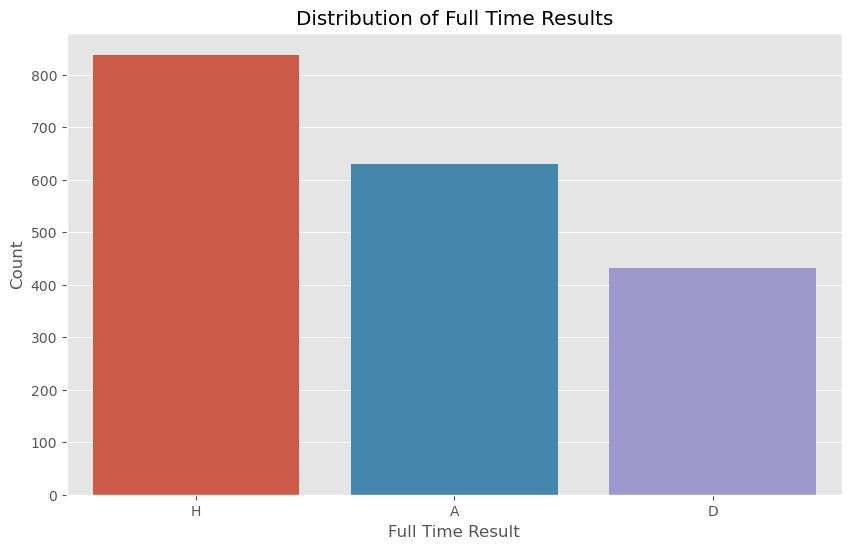

In [44]:
# Distribution of Full Time Results
plt.figure(figsize=(10, 6))
sns.countplot(x='FTR', data=total_df)
plt.title('Distribution of Full Time Results')
plt.xlabel('Full Time Result')
plt.ylabel('Count')
plt.show()

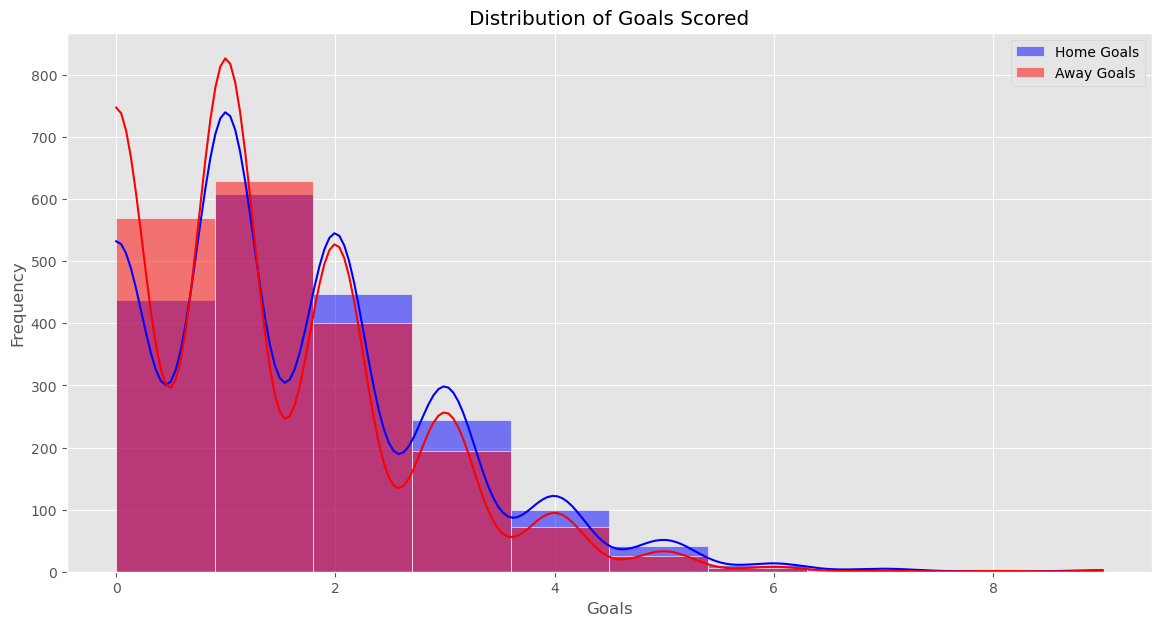

In [45]:
# Goals Scored Analysis
plt.figure(figsize=(14, 7))
sns.histplot(total_df['FTHG'], bins=10, kde=True, color='blue', label='Home Goals')
sns.histplot(total_df['FTAG'], bins=10, kde=True, color='red', label='Away Goals')
plt.title('Distribution of Goals Scored')
plt.xlabel('Goals')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [20]:
total_df.columns

Index(['div', 'date', 'time', 'hometeam', 'awayteam', 'fthg', 'ftag', 'ftr',
       'hthg', 'htag',
       ...
       'avgc<2.5', 'ahch', 'b365cahh', 'b365caha', 'pcahh', 'pcaha', 'maxcahh',
       'maxcaha', 'avgcahh', 'avgcaha'],
      dtype='object', length=106)

In [46]:
# Home vs Away Wins
home_wins = total_df[total_df['FTR'] == 'H'].shape[0]
away_wins = total_df[total_df['FTR'] == 'A'].shape[0]
draws = total_df[total_df['FTR'] == 'D'].shape[0]

print(f'Home Wins: {home_wins}')
print(f'Away Wins: {away_wins}')
print(f'Draws: {draws}')


Home Wins: 838
Away Wins: 630
Draws: 432


In [12]:
total_df.columns

Index(['Div', 'Date', 'Time', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR',
       'HTHG', 'HTAG',
       ...
       'AvgC<2.5', 'AHCh', 'B365CAHH', 'B365CAHA', 'PCAHH', 'PCAHA', 'MaxCAHH',
       'MaxCAHA', 'AvgCAHH', 'AvgCAHA'],
      dtype='object', length=106)

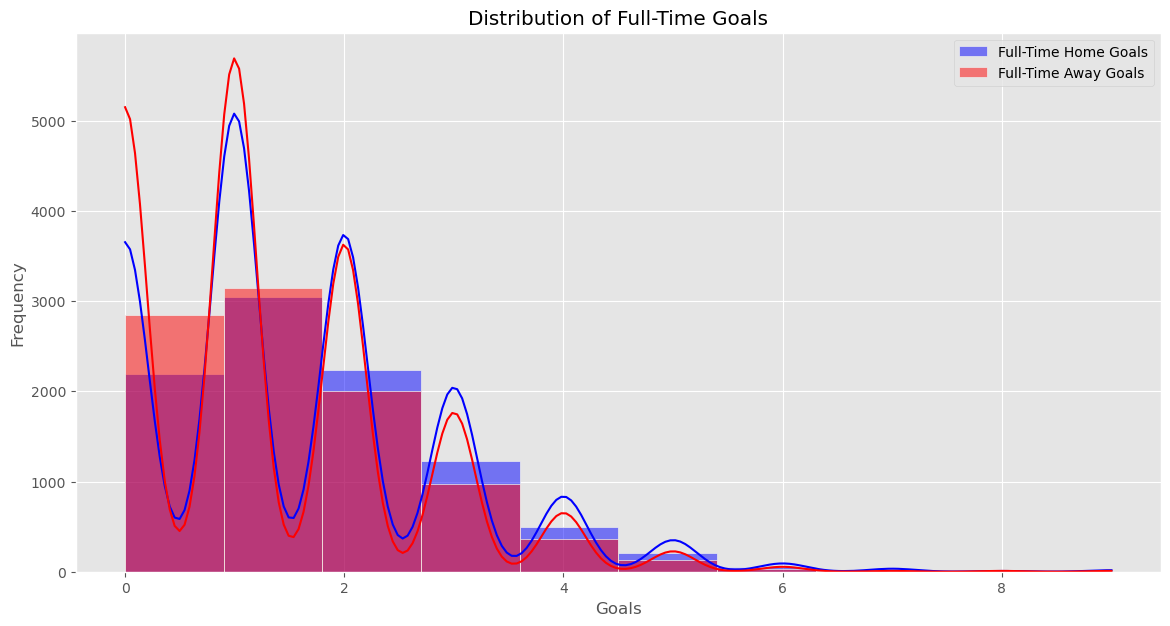

In [14]:
# Goals Analysis
plt.figure(figsize=(14, 7))
sns.histplot(total_df['FTHG'], bins=10, kde=True, color='blue', label='Full-Time Home Goals')
sns.histplot(total_df['FTAG'], bins=10, kde=True, color='red', label='Full-Time Away Goals')
plt.title('Distribution of Full-Time Goals')
plt.xlabel('Goals')
plt.ylabel('Frequency')
plt.legend()
plt.show()

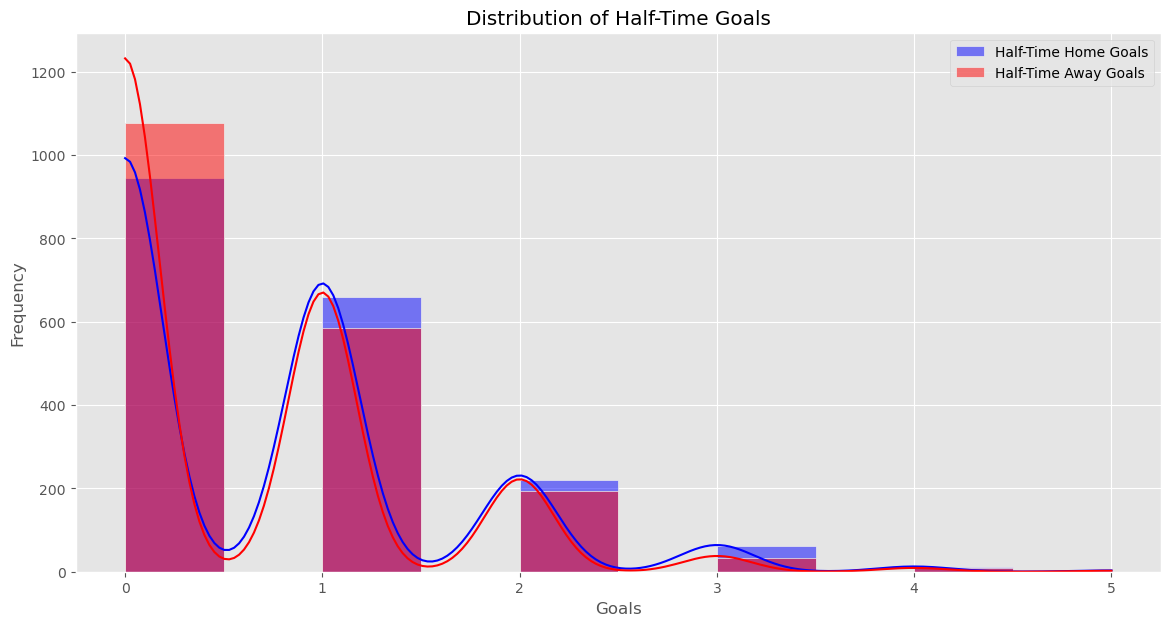

In [47]:
# Half-Time Goals Analysis
plt.figure(figsize=(14, 7))
sns.histplot(total_df['HTHG'], bins=10, kde=True, color='blue', label='Half-Time Home Goals')
sns.histplot(total_df['HTAG'], bins=10, kde=True, color='red', label='Half-Time Away Goals')
plt.title('Distribution of Half-Time Goals')
plt.xlabel('Goals')
plt.ylabel('Frequency')
plt.legend()
plt.show()


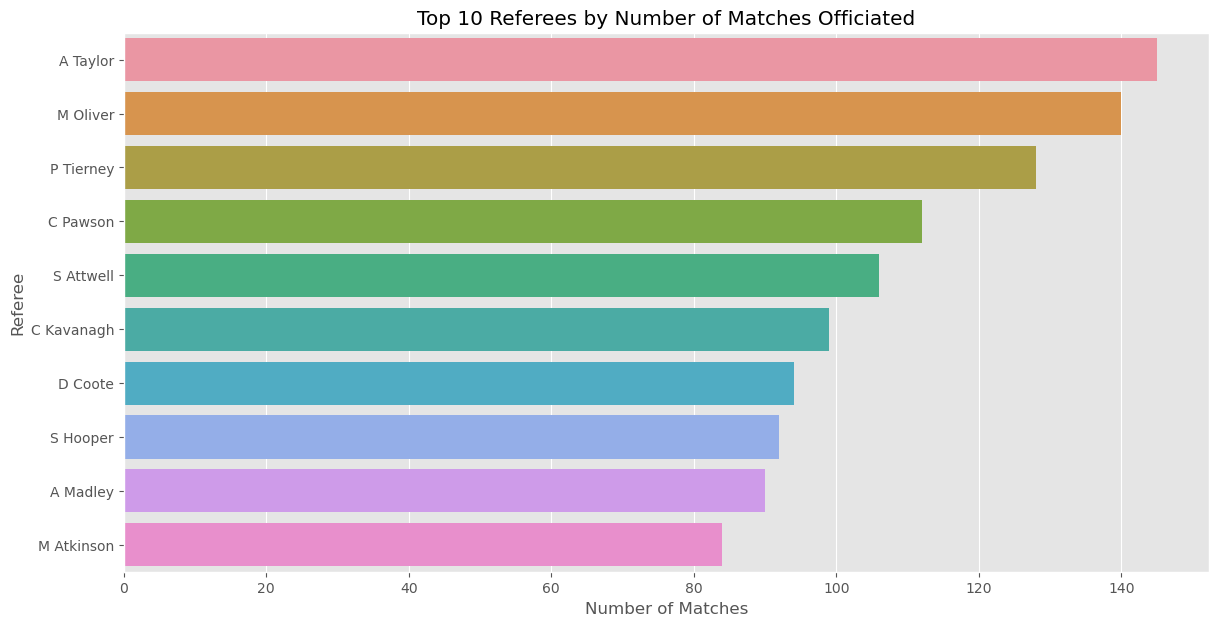

In [48]:
# Referee Analysis
plt.figure(figsize=(14, 7))
sns.countplot(y='Referee', data=total_df, order=total_df['Referee'].value_counts().index[:10])
plt.title('Top 10 Referees by Number of Matches Officiated')
plt.xlabel('Number of Matches')
plt.ylabel('Referee')
plt.show()

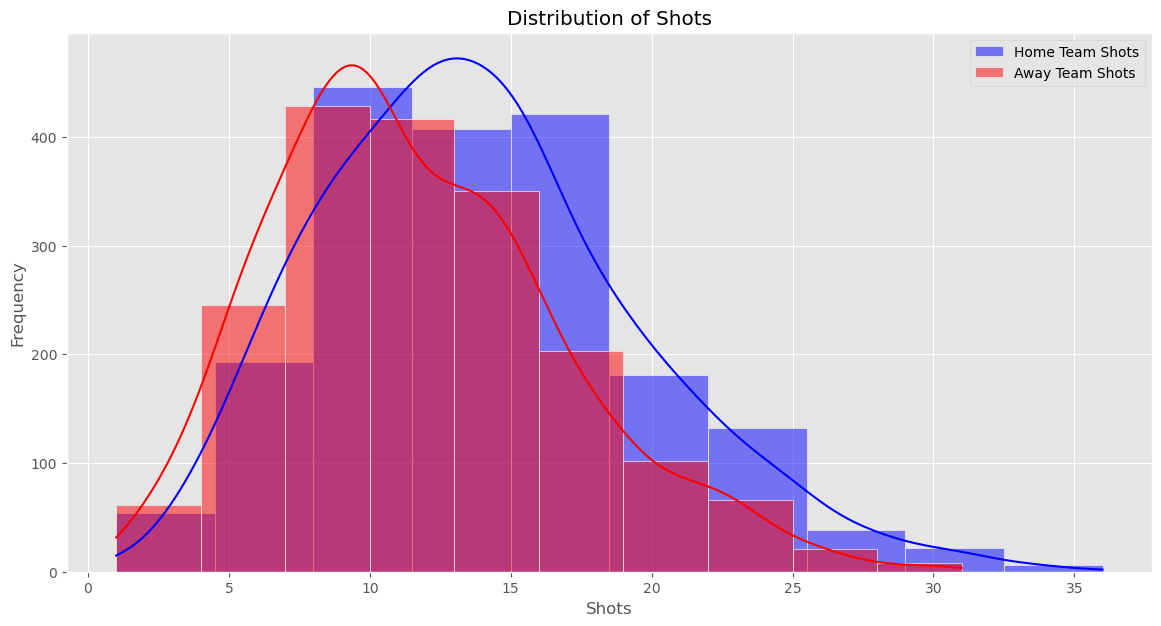

In [49]:
plt.figure(figsize=(14, 7))
sns.histplot(total_df['HS'], bins=10, kde=True, color='blue', label='Home Team Shots')
sns.histplot(total_df['AS'], bins=10, kde=True, color='red', label='Away Team Shots')
plt.title('Distribution of Shots')
plt.xlabel('Shots')
plt.ylabel('Frequency')
plt.legend()
plt.show()

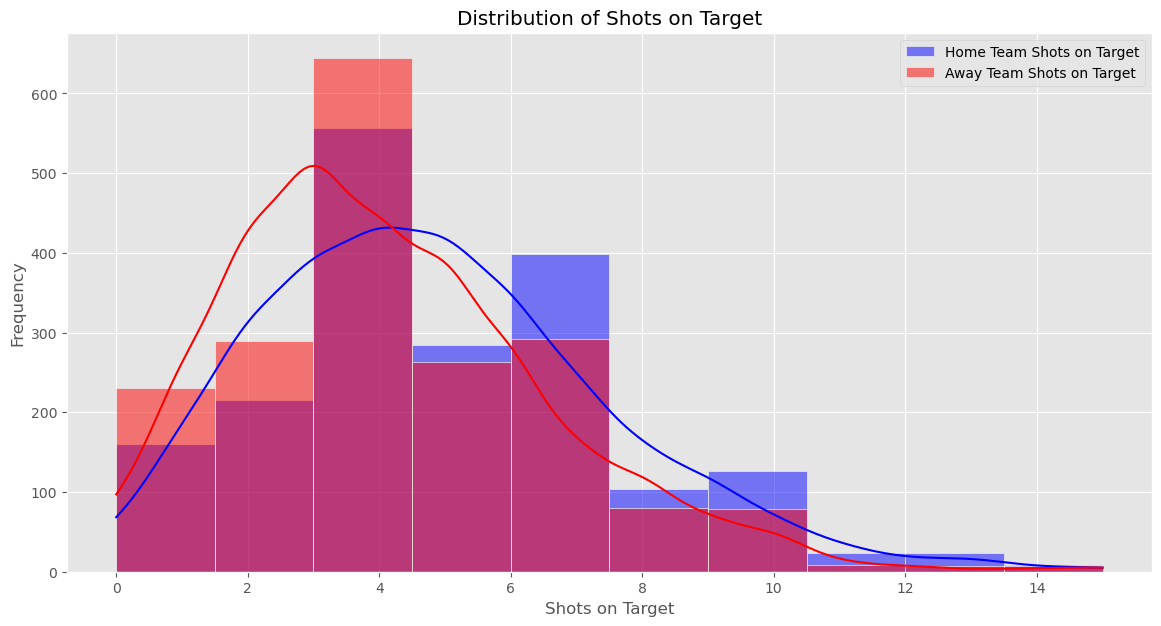

In [50]:
# Shots on Target Analysis
plt.figure(figsize=(14, 7))
sns.histplot(total_df['HST'], bins=10, kde=True, color='blue', label='Home Team Shots on Target')
sns.histplot(total_df['AST'], bins=10, kde=True, color='red', label='Away Team Shots on Target')
plt.title('Distribution of Shots on Target')
plt.xlabel('Shots on Target')
plt.ylabel('Frequency')
plt.legend()
plt.show()

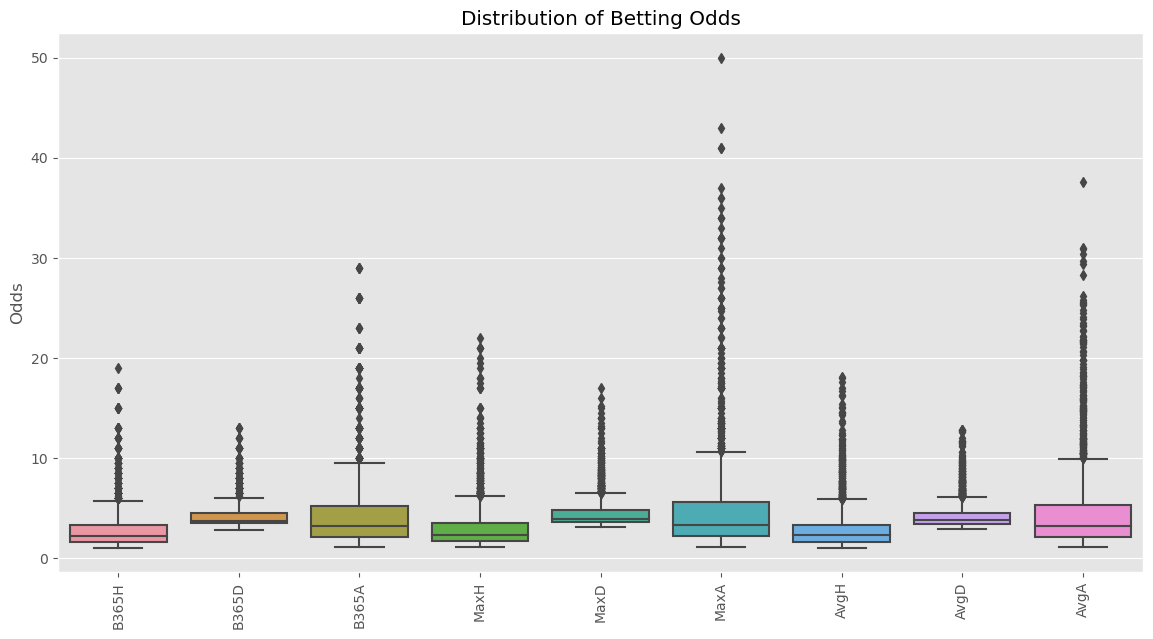

In [51]:
# 4. Betting Odds Analysis
betting_cols = ['B365H', 'B365D', 'B365A', 'MaxH', 'MaxD', 'MaxA', 'AvgH', 'AvgD', 'AvgA']
betting_data = total_df[betting_cols]

plt.figure(figsize=(14, 7))
sns.boxplot(data=betting_data)
plt.title('Distribution of Betting Odds')
plt.xticks(rotation=90)
plt.ylabel('Odds')
plt.show()

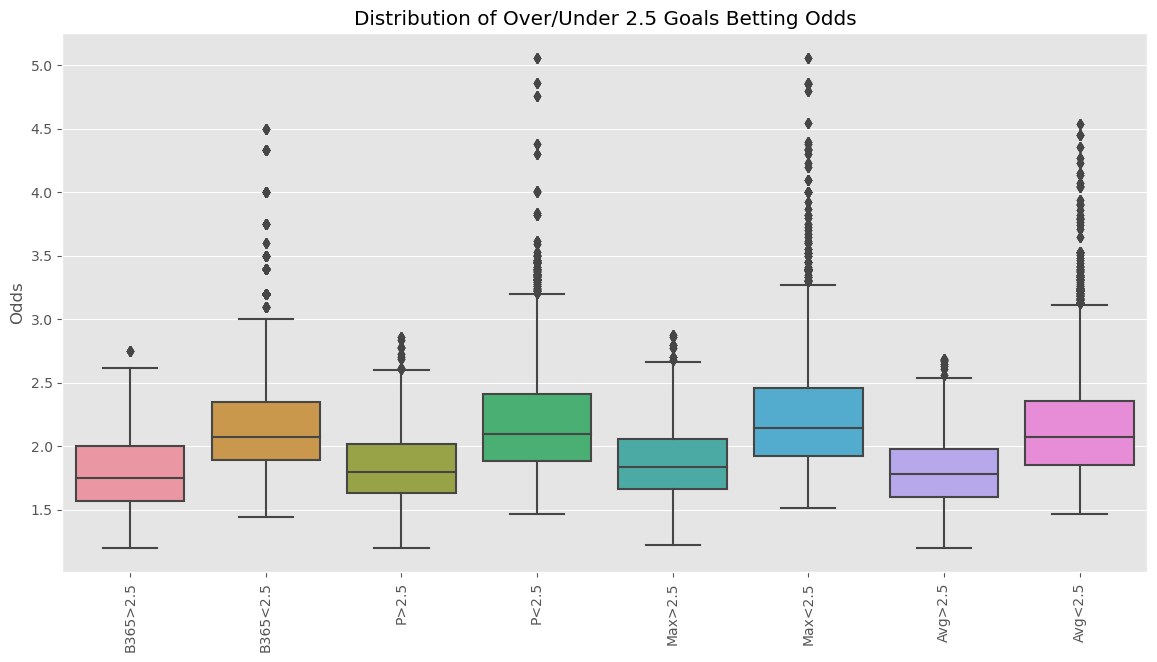

In [20]:
#Over/Under Goals Analysis
over_under_cols = ['B365>2.5', 'B365<2.5', 'P>2.5', 'P<2.5', 'Max>2.5', 'Max<2.5', 'Avg>2.5', 'Avg<2.5']
over_under_data = total_df[over_under_cols]

plt.figure(figsize=(14, 7))
sns.boxplot(data=over_under_data)
plt.title('Distribution of Over/Under 2.5 Goals Betting Odds')
plt.xticks(rotation=90)
plt.ylabel('Odds')
plt.show()

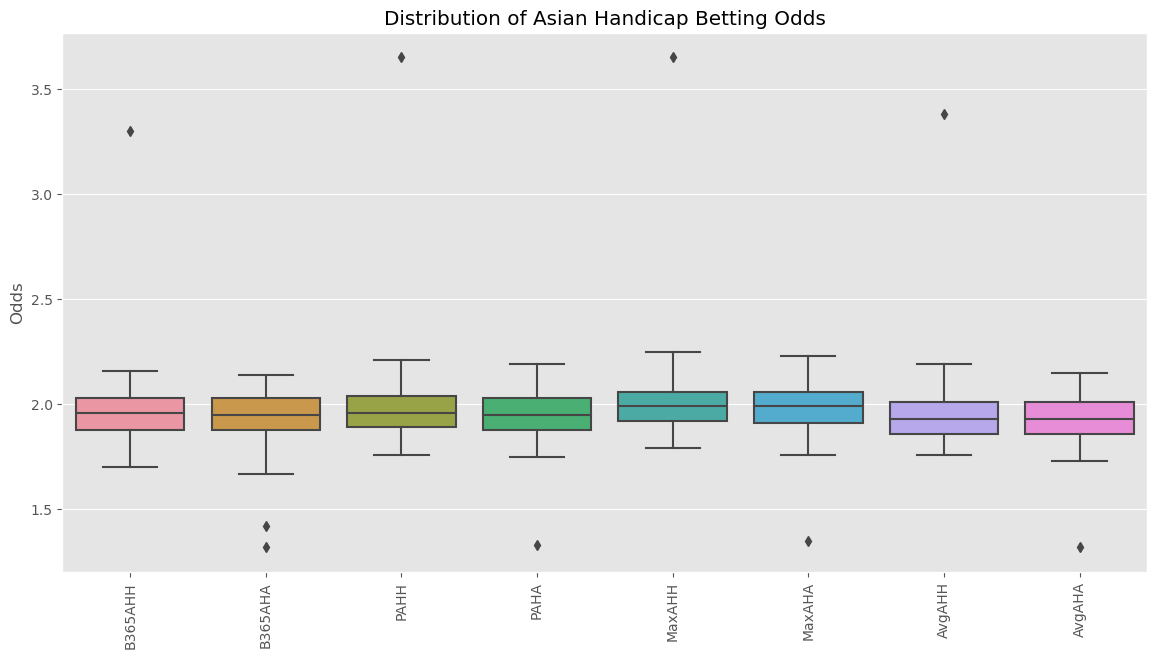

In [52]:
# Asian Handicap Analysis
asian_handicap_cols = ['B365AHH', 'B365AHA', 'PAHH', 'PAHA', 'MaxAHH', 'MaxAHA', 'AvgAHH', 'AvgAHA']
asian_handicap_data = total_df[asian_handicap_cols]

plt.figure(figsize=(14, 7))
sns.boxplot(data=asian_handicap_data)
plt.title('Distribution of Asian Handicap Betting Odds')
plt.xticks(rotation=90)
plt.ylabel('Odds')
plt.show()

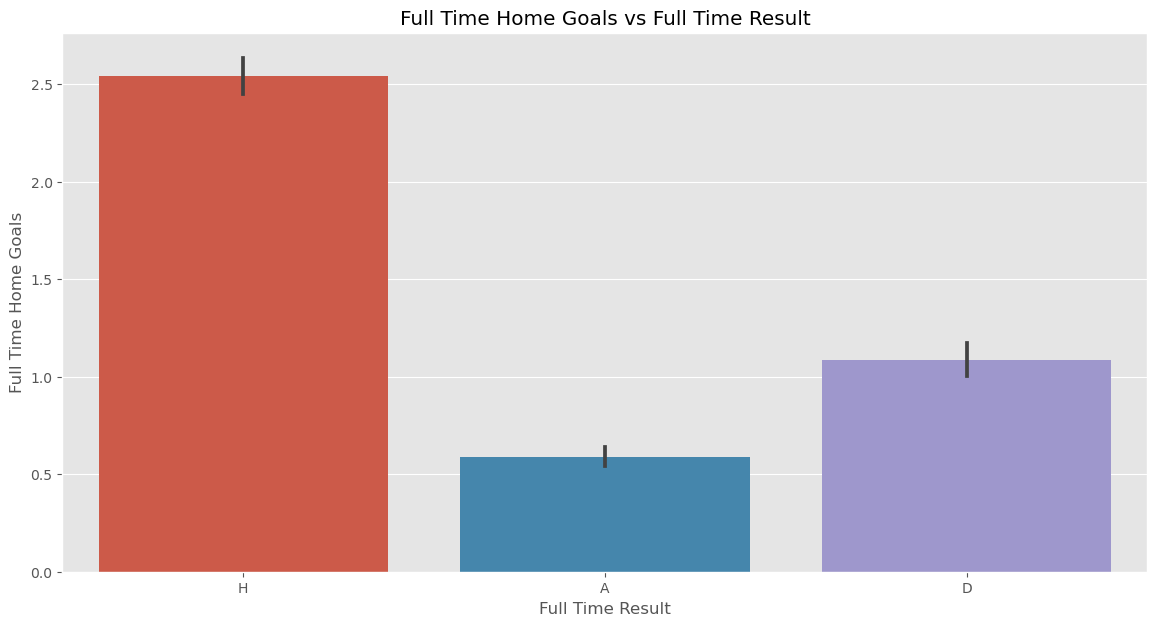

In [53]:
# Goals vs FTR
plt.figure(figsize=(14, 7))
sns.barplot(x='FTR', y='FTHG', data=total_df)
plt.title('Full Time Home Goals vs Full Time Result')
plt.xlabel('Full Time Result')
plt.ylabel('Full Time Home Goals')
plt.show()

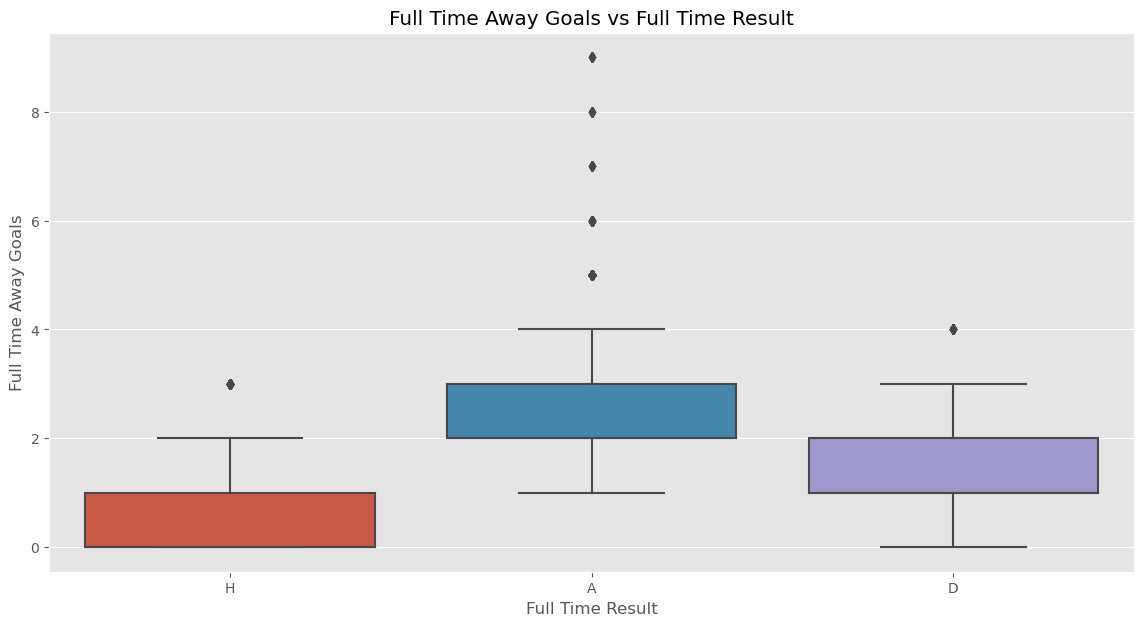

In [25]:
plt.figure(figsize=(14, 7))
sns.boxplot(x='FTR', y='FTAG', data=total_df)
plt.title('Full Time Away Goals vs Full Time Result')
plt.xlabel('Full Time Result')
plt.ylabel('Full Time Away Goals')
plt.show()

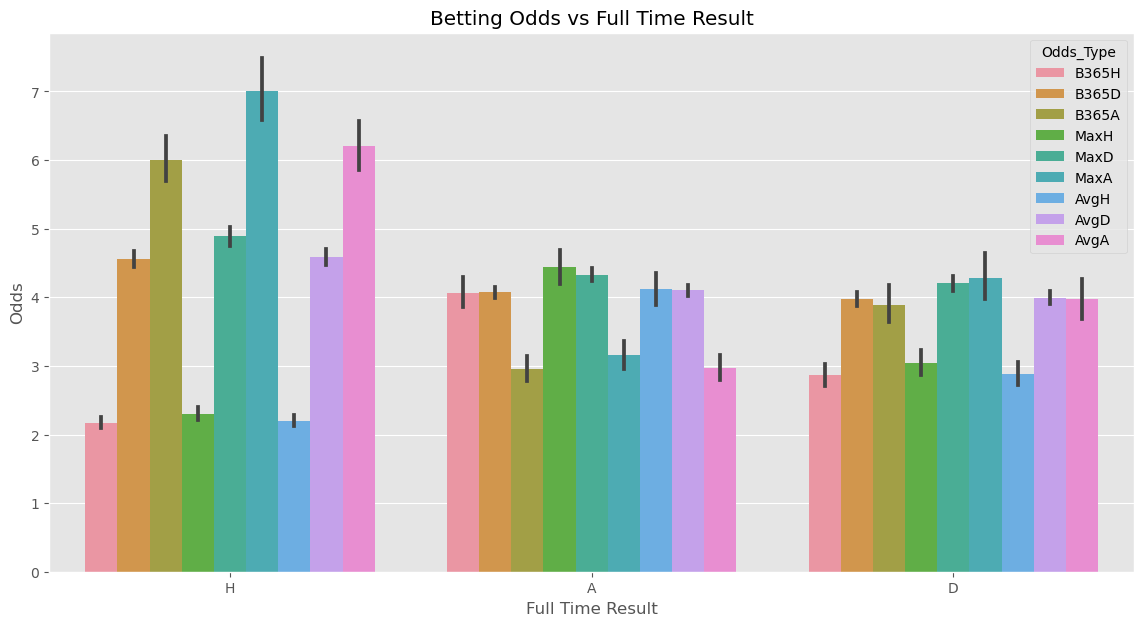

In [54]:
# Betting Odds vs FTR
odds_cols = ['B365H', 'B365D', 'B365A', 'MaxH', 'MaxD', 'MaxA', 'AvgH', 'AvgD', 'AvgA']
melted_df = total_df.melt(id_vars=['FTR'], value_vars=odds_cols, var_name='Odds_Type', value_name='Odds')

plt.figure(figsize=(14, 7))
sns.barplot(x='FTR', y='Odds', hue='Odds_Type', data=melted_df)
plt.title('Betting Odds vs Full Time Result')
plt.xlabel('Full Time Result')
plt.ylabel('Odds')
plt.show()


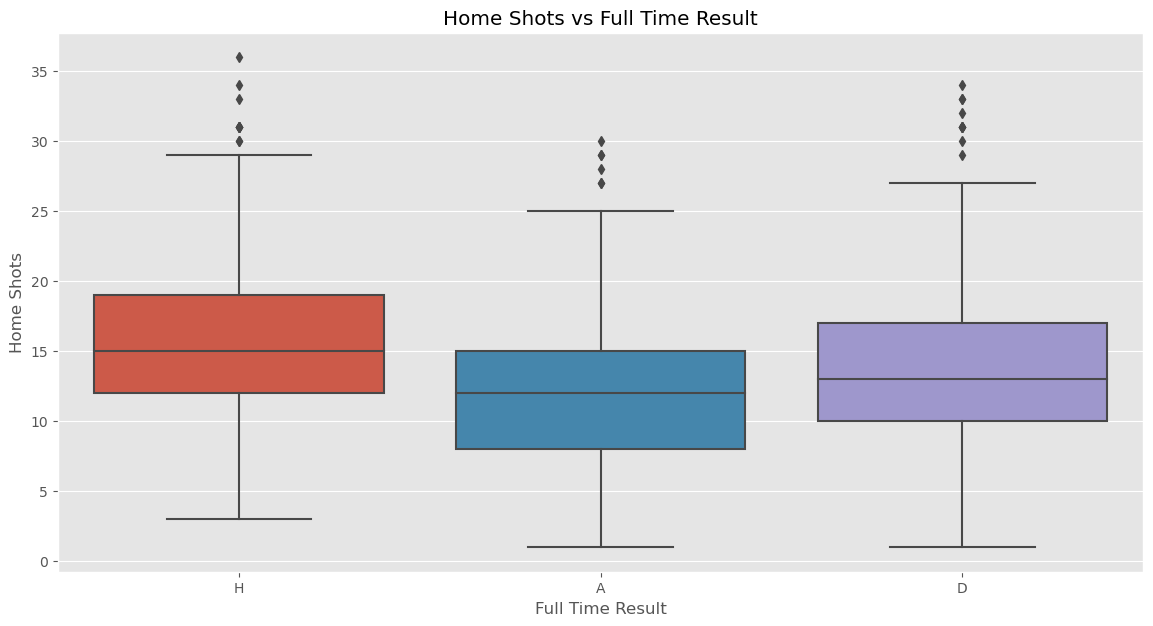

In [55]:
# Shots vs FTR
plt.figure(figsize=(14, 7))
sns.boxplot(x='FTR', y='HS', data=total_df)
plt.title('Home Shots vs Full Time Result')
plt.xlabel('Full Time Result')
plt.ylabel('Home Shots')
plt.show()

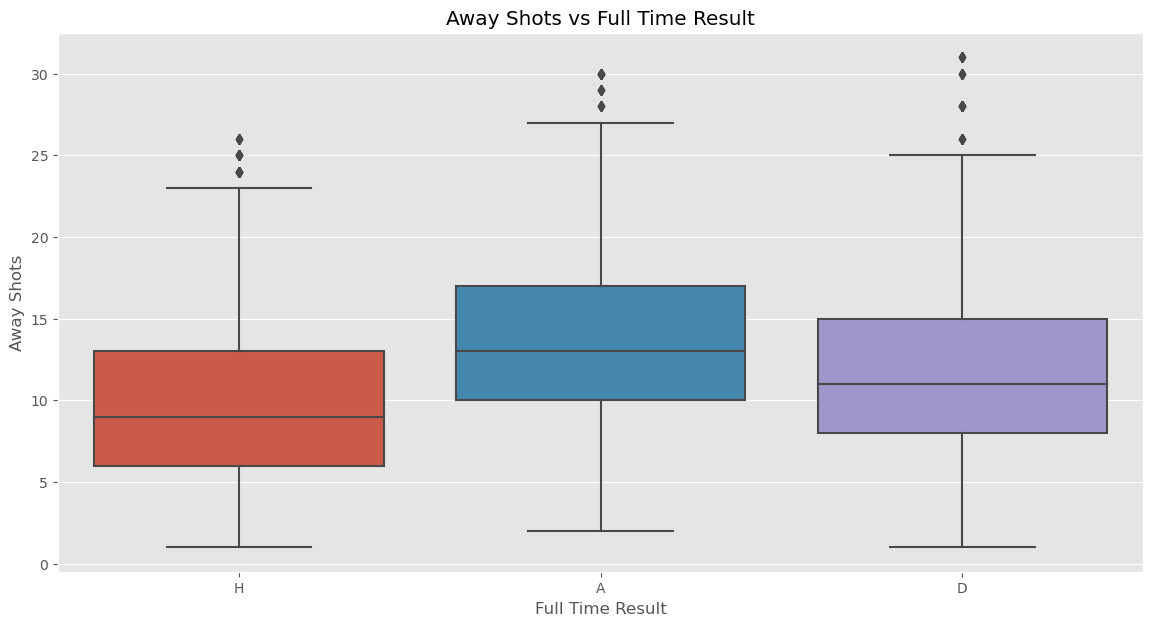

In [29]:
plt.figure(figsize=(14, 7))
sns.boxplot(x='FTR', y='AS', data=total_df)
plt.title('Away Shots vs Full Time Result')
plt.xlabel('Full Time Result')
plt.ylabel('Away Shots')
plt.show()  

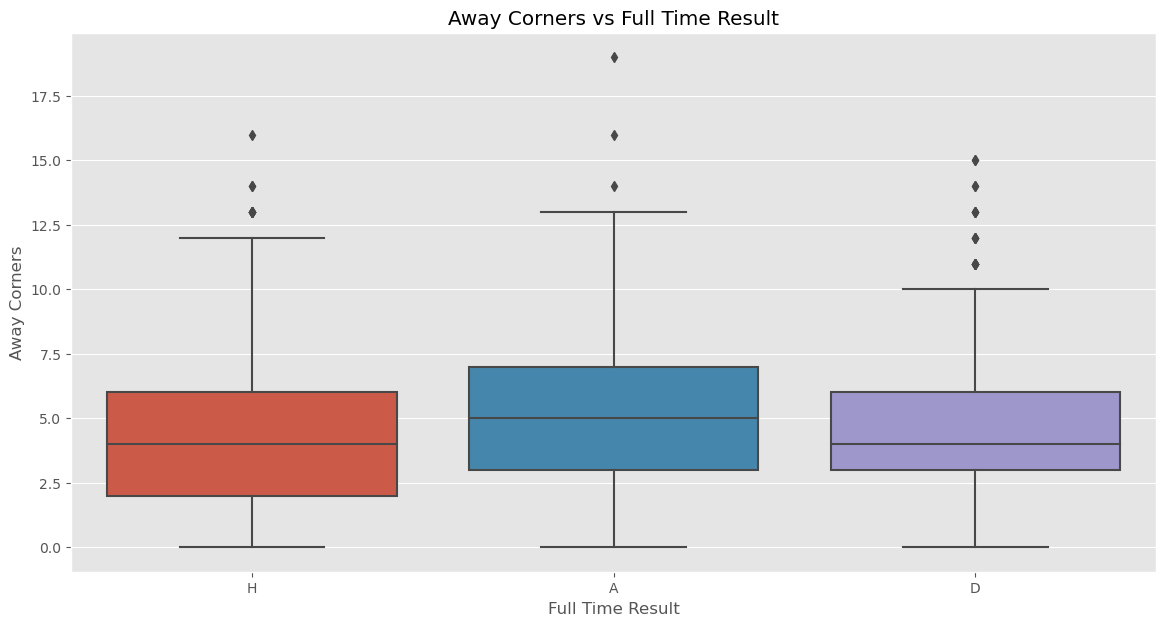

In [56]:
plt.figure(figsize=(14, 7))
sns.boxplot(x='FTR', y='AC', data=total_df)
plt.title('Away Corners vs Full Time Result')
plt.xlabel('Full Time Result')
plt.ylabel('Away Corners')
plt.show()

In [58]:
new_df = total_df.copy()

In [59]:
new_df.columns = [i.lower() for i in new_df.columns]
new_df["date"] = pd.to_datetime(new_df["date"], format="%d/%m/%Y")
result_data = new_df[["div", "date", "time", "hometeam", "awayteam", "fthg", "ftag", "ftr", "hthg", "htag", "htr"]]

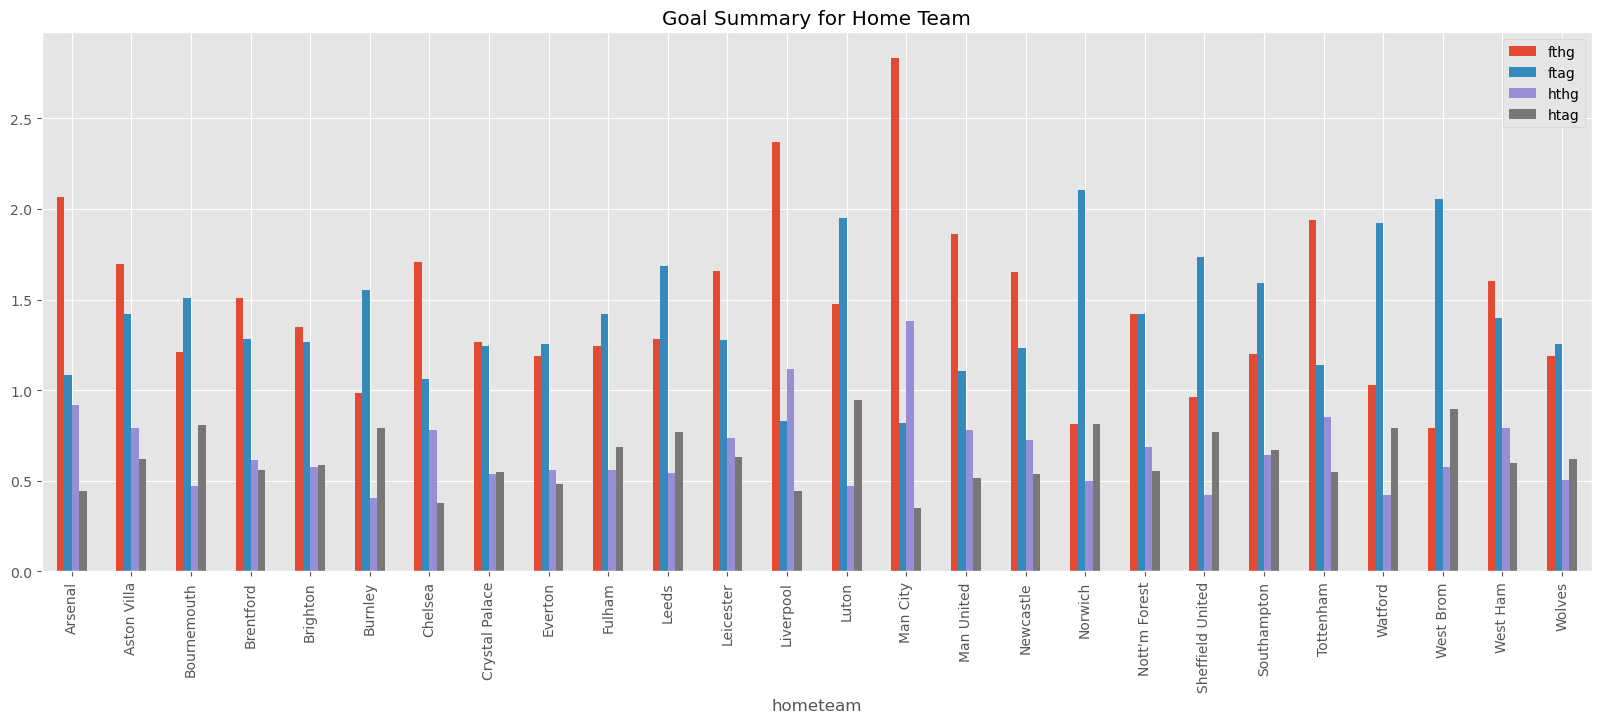

In [60]:
result_data.groupby("hometeam")[[ "fthg", "ftag", "hthg", "htag"]].mean().plot(kind="bar",
                                                                               figsize=(20, 7),
                                                                               title="Goal Summary for Home Team")
plt.show()

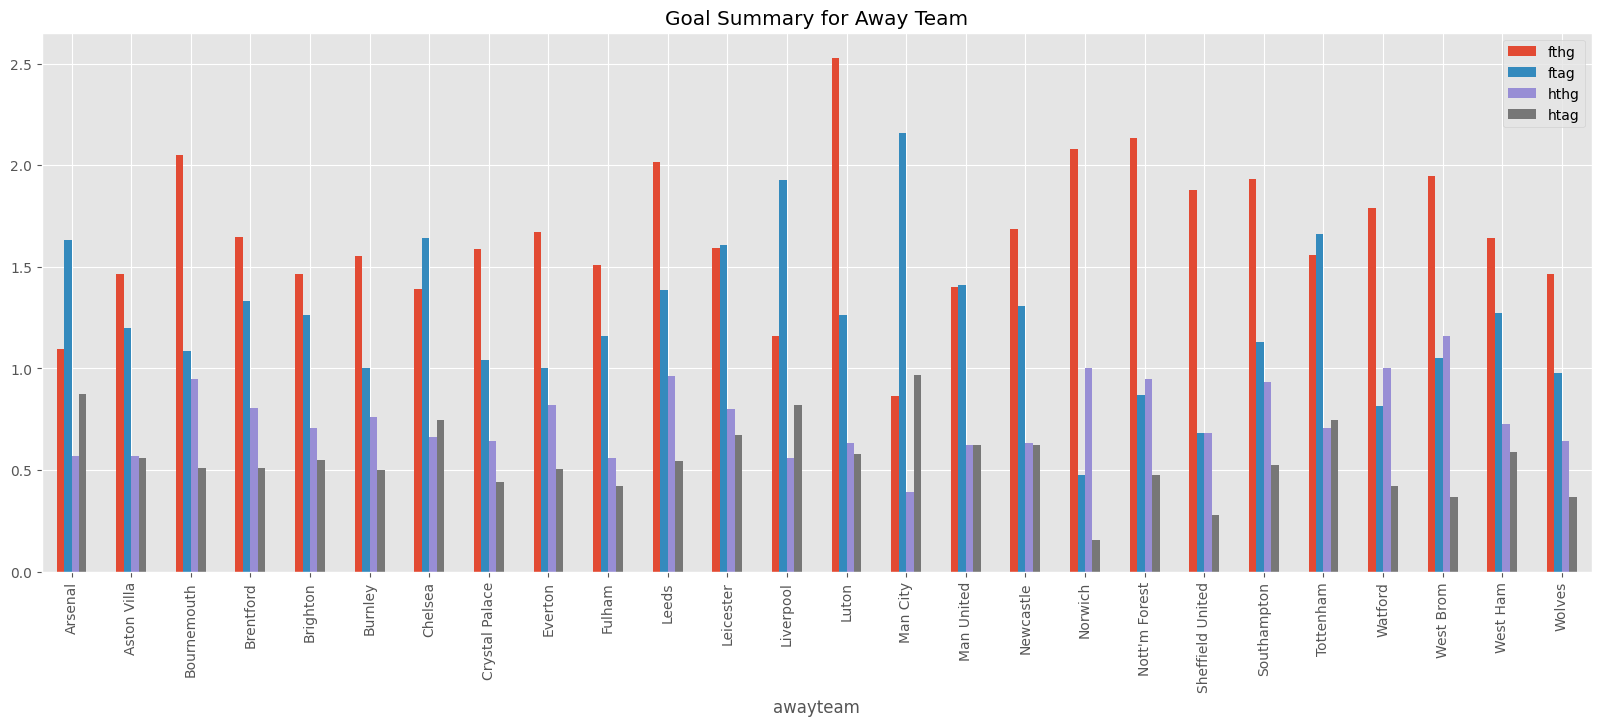

In [14]:
result_data.groupby("awayteam")[[ "fthg", "ftag", "hthg", "htag"]].mean().plot(kind="bar",
                                                                               figsize=(20, 7),
                                                                               title="Goal Summary for Away Team")
plt.show()

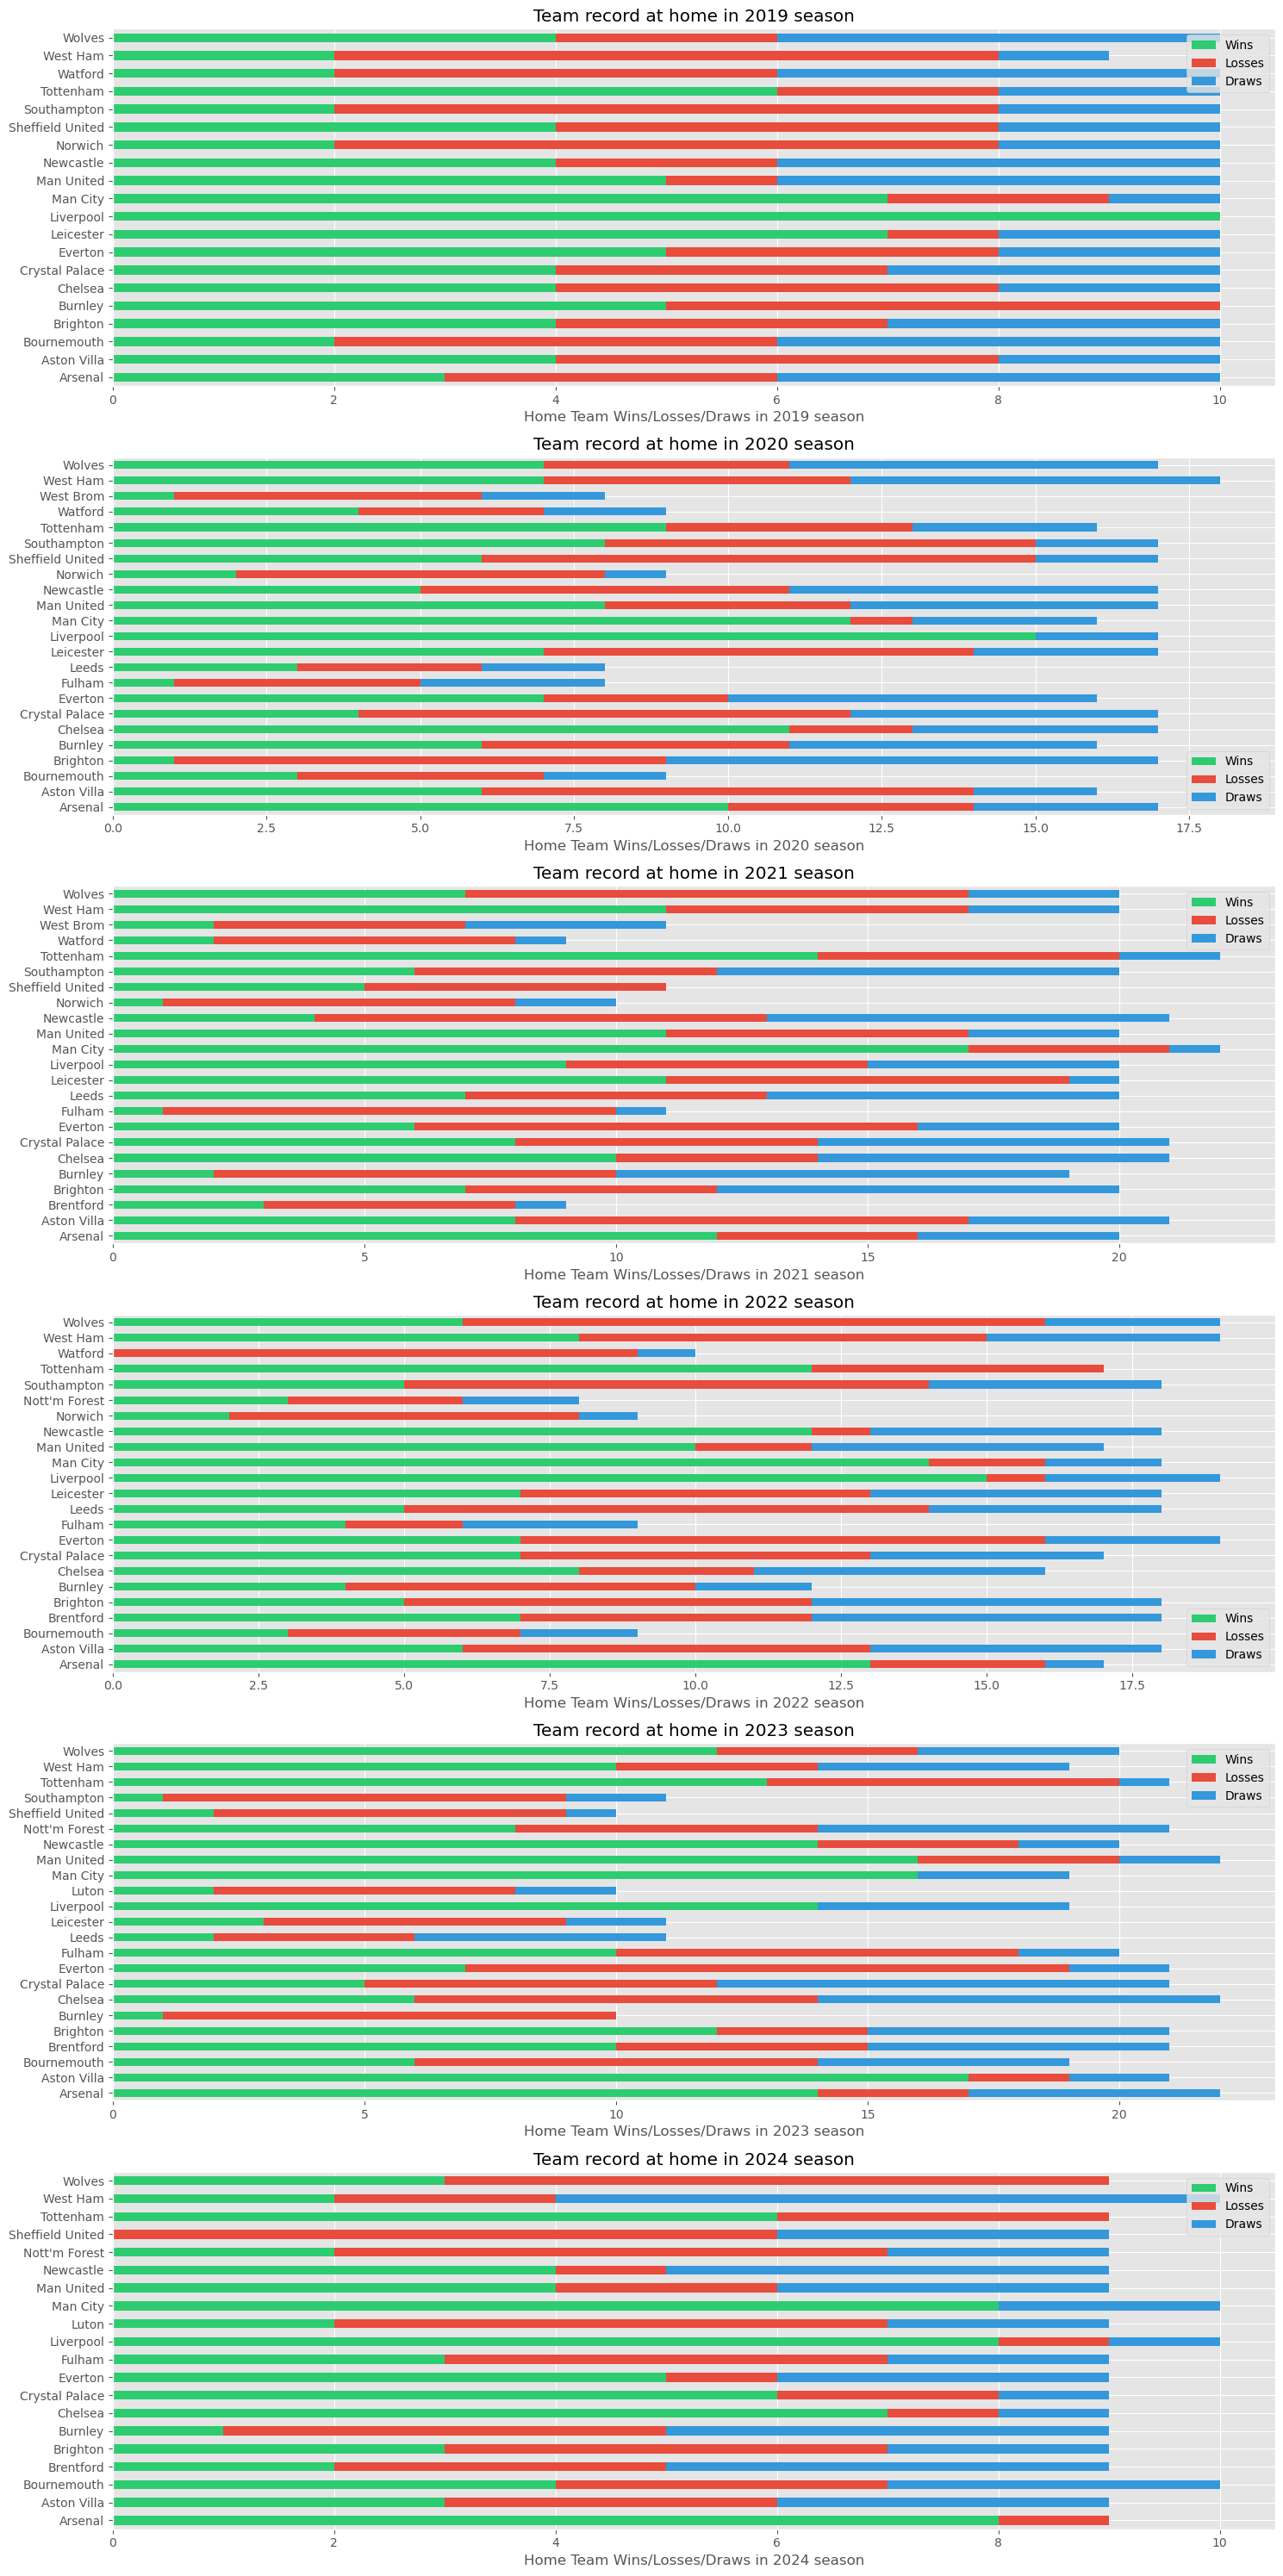

In [61]:
result_data['year'] = pd.to_datetime(result_data['date']).dt.year

home_result = result_data.groupby(['hometeam', 'year', 'ftr']).size().unstack(fill_value=0).reset_index()
home_result.columns.name = None
home_result = home_result.rename(columns={'H': 'Wins', 'A': 'Losses', 'D': 'Draws'})
home_result['NumOfGames'] = home_result[['Wins', 'Losses', 'Draws']].sum(axis=1)

years = home_result['year'].unique()

colors = ['#2ecc71', '#e74c3c', '#3498db'] 

fig, ax1 = plt.subplots(len(years), 1)
fig.set_size_inches(15, len(years) * 5)

for year, i in zip(years, range(len(years))):
    year_data = home_result[home_result['year'] == year]
    year_data.set_index('hometeam')[['Wins', 'Losses', 'Draws']].plot(kind='barh', stacked=True, ax=ax1[i], color=colors)
    ax1[i].set_title(f'Team record at home in {year} season')
    ax1[i].set_xlabel(f'Home Team Wins/Losses/Draws in {year} season')
    ax1[i].set_ylabel('')

plt.tight_layout()
plt.show()

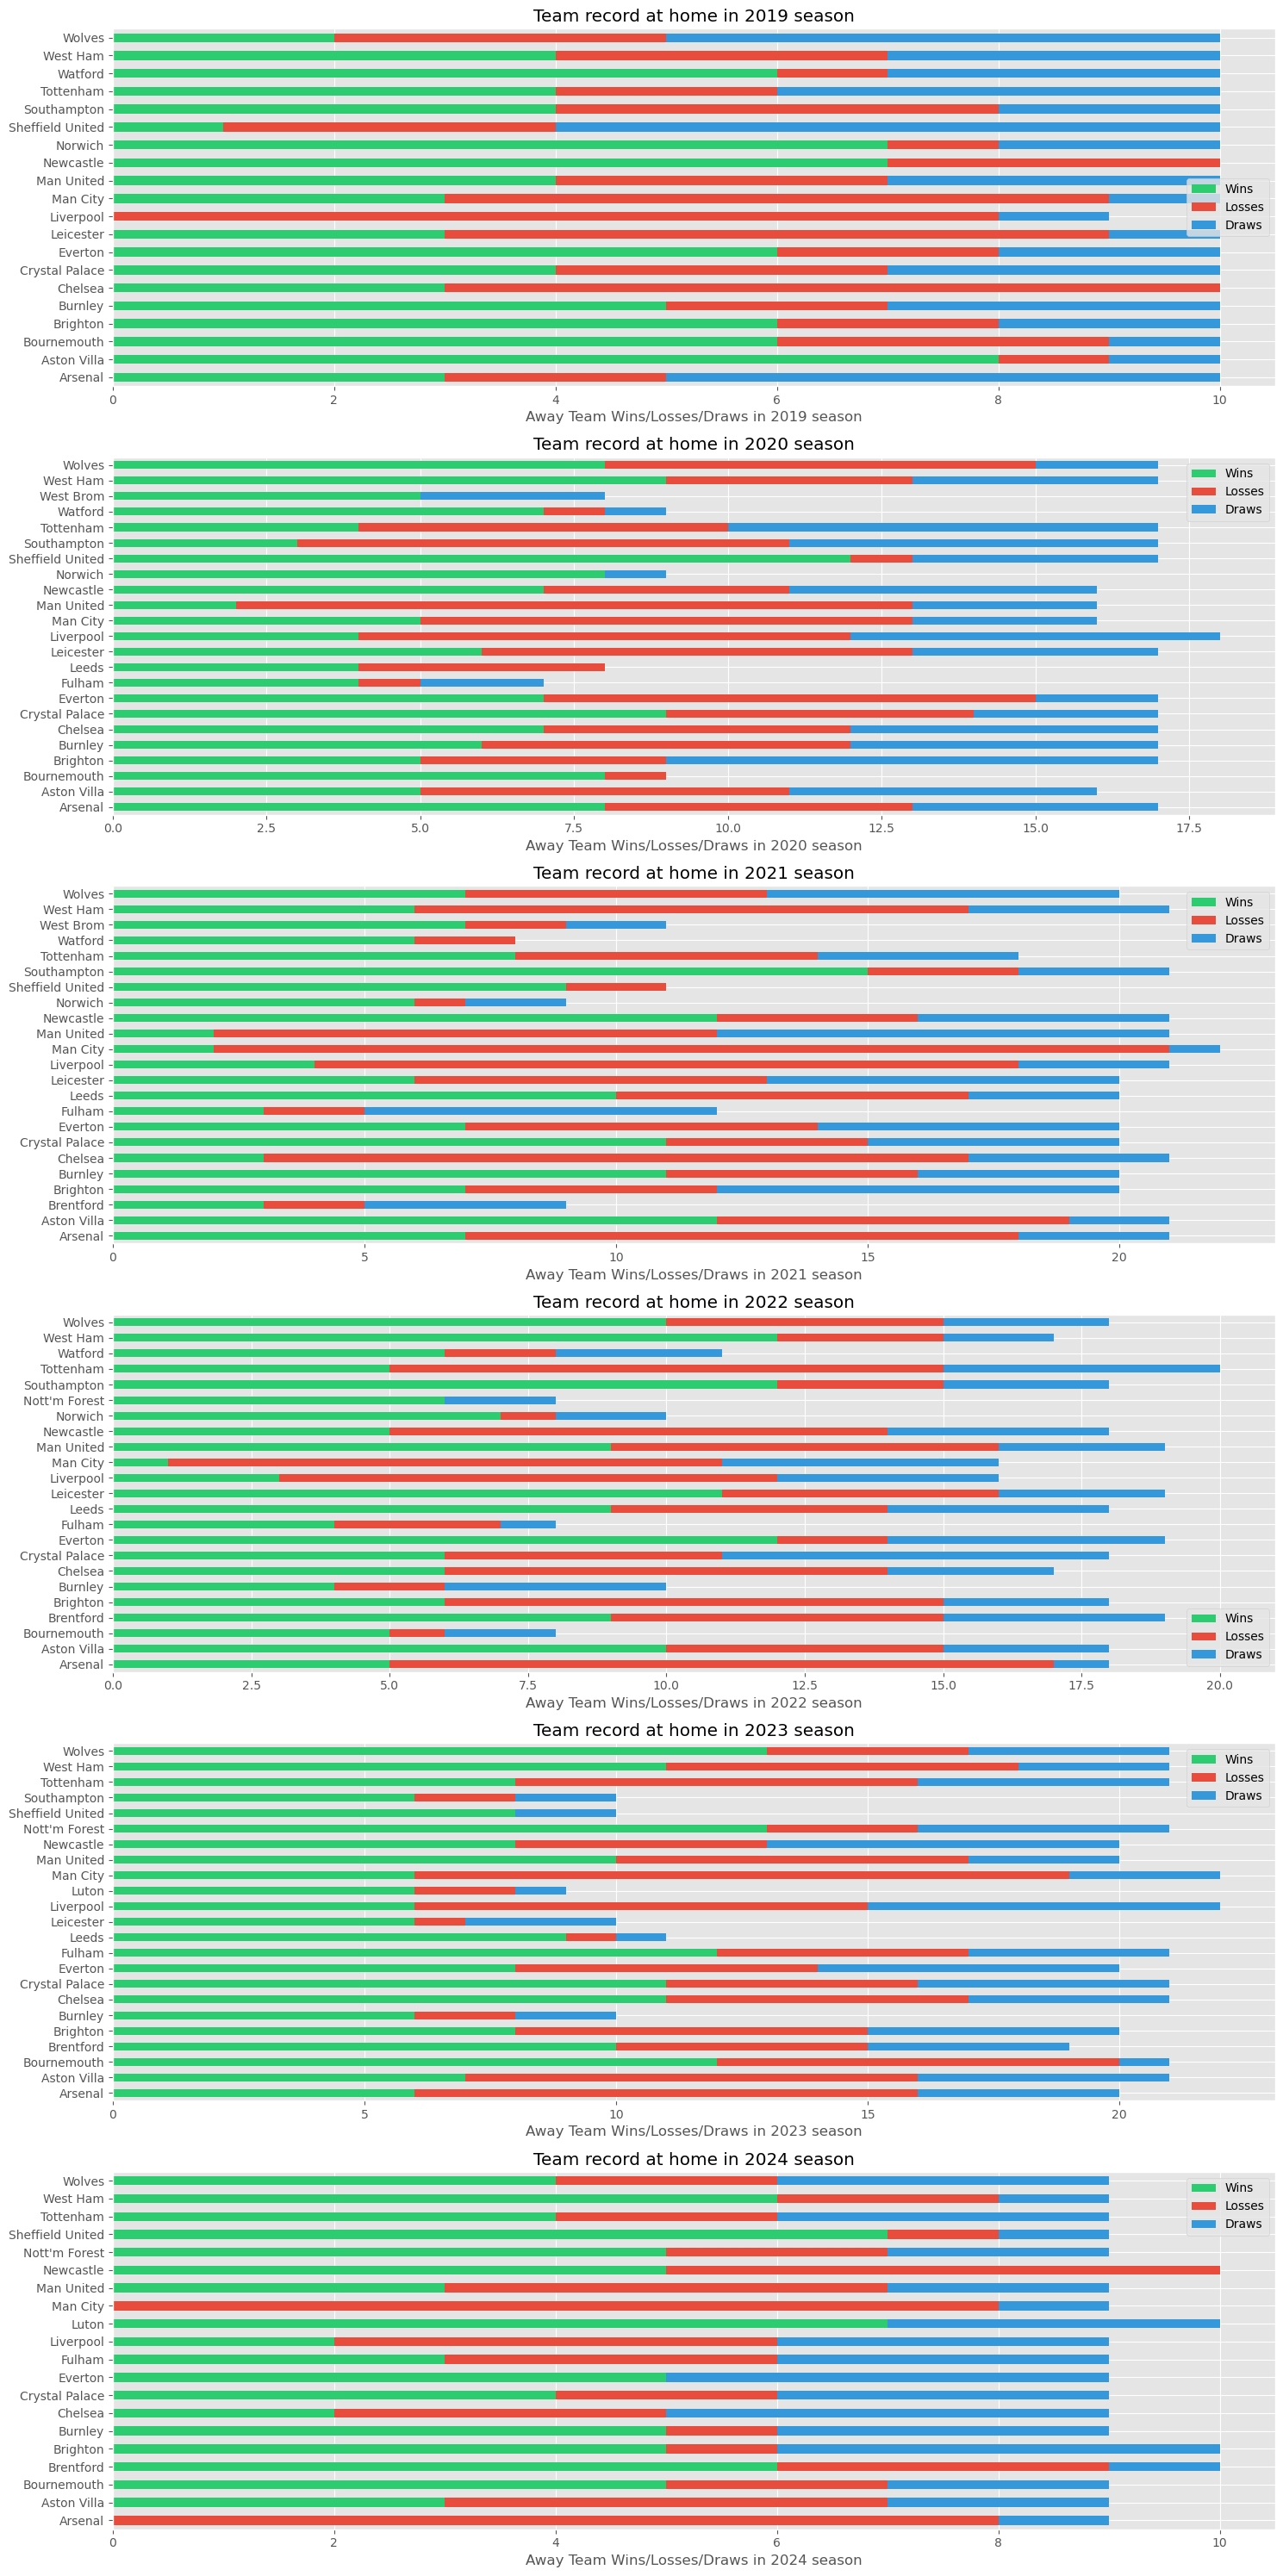

In [62]:
result_data['year'] = pd.to_datetime(result_data['date']).dt.year

home_result = result_data.groupby(['awayteam', 'year', 'ftr']).size().unstack(fill_value=0).reset_index()
home_result.columns.name = None
home_result = home_result.rename(columns={'H': 'Wins', 'A': 'Losses', 'D': 'Draws'})
home_result['NumOfGames'] = home_result[['Wins', 'Losses', 'Draws']].sum(axis=1)

years = home_result['year'].unique()

colors = ['#2ecc71', '#e74c3c', '#3498db'] 

fig, ax1 = plt.subplots(len(years), 1)
fig.set_size_inches(15, len(years) * 5)

for year, i in zip(years, range(len(years))):
    year_data = home_result[home_result['year'] == year]
    year_data.set_index('awayteam')[['Wins', 'Losses', 'Draws']].plot(kind='barh', stacked=True, ax=ax1[i], color=colors)
    ax1[i].set_title(f'Team record at home in {year} season')
    ax1[i].set_xlabel(f'Away Team Wins/Losses/Draws in {year} season')
    ax1[i].set_ylabel('')

plt.tight_layout()
plt.show()

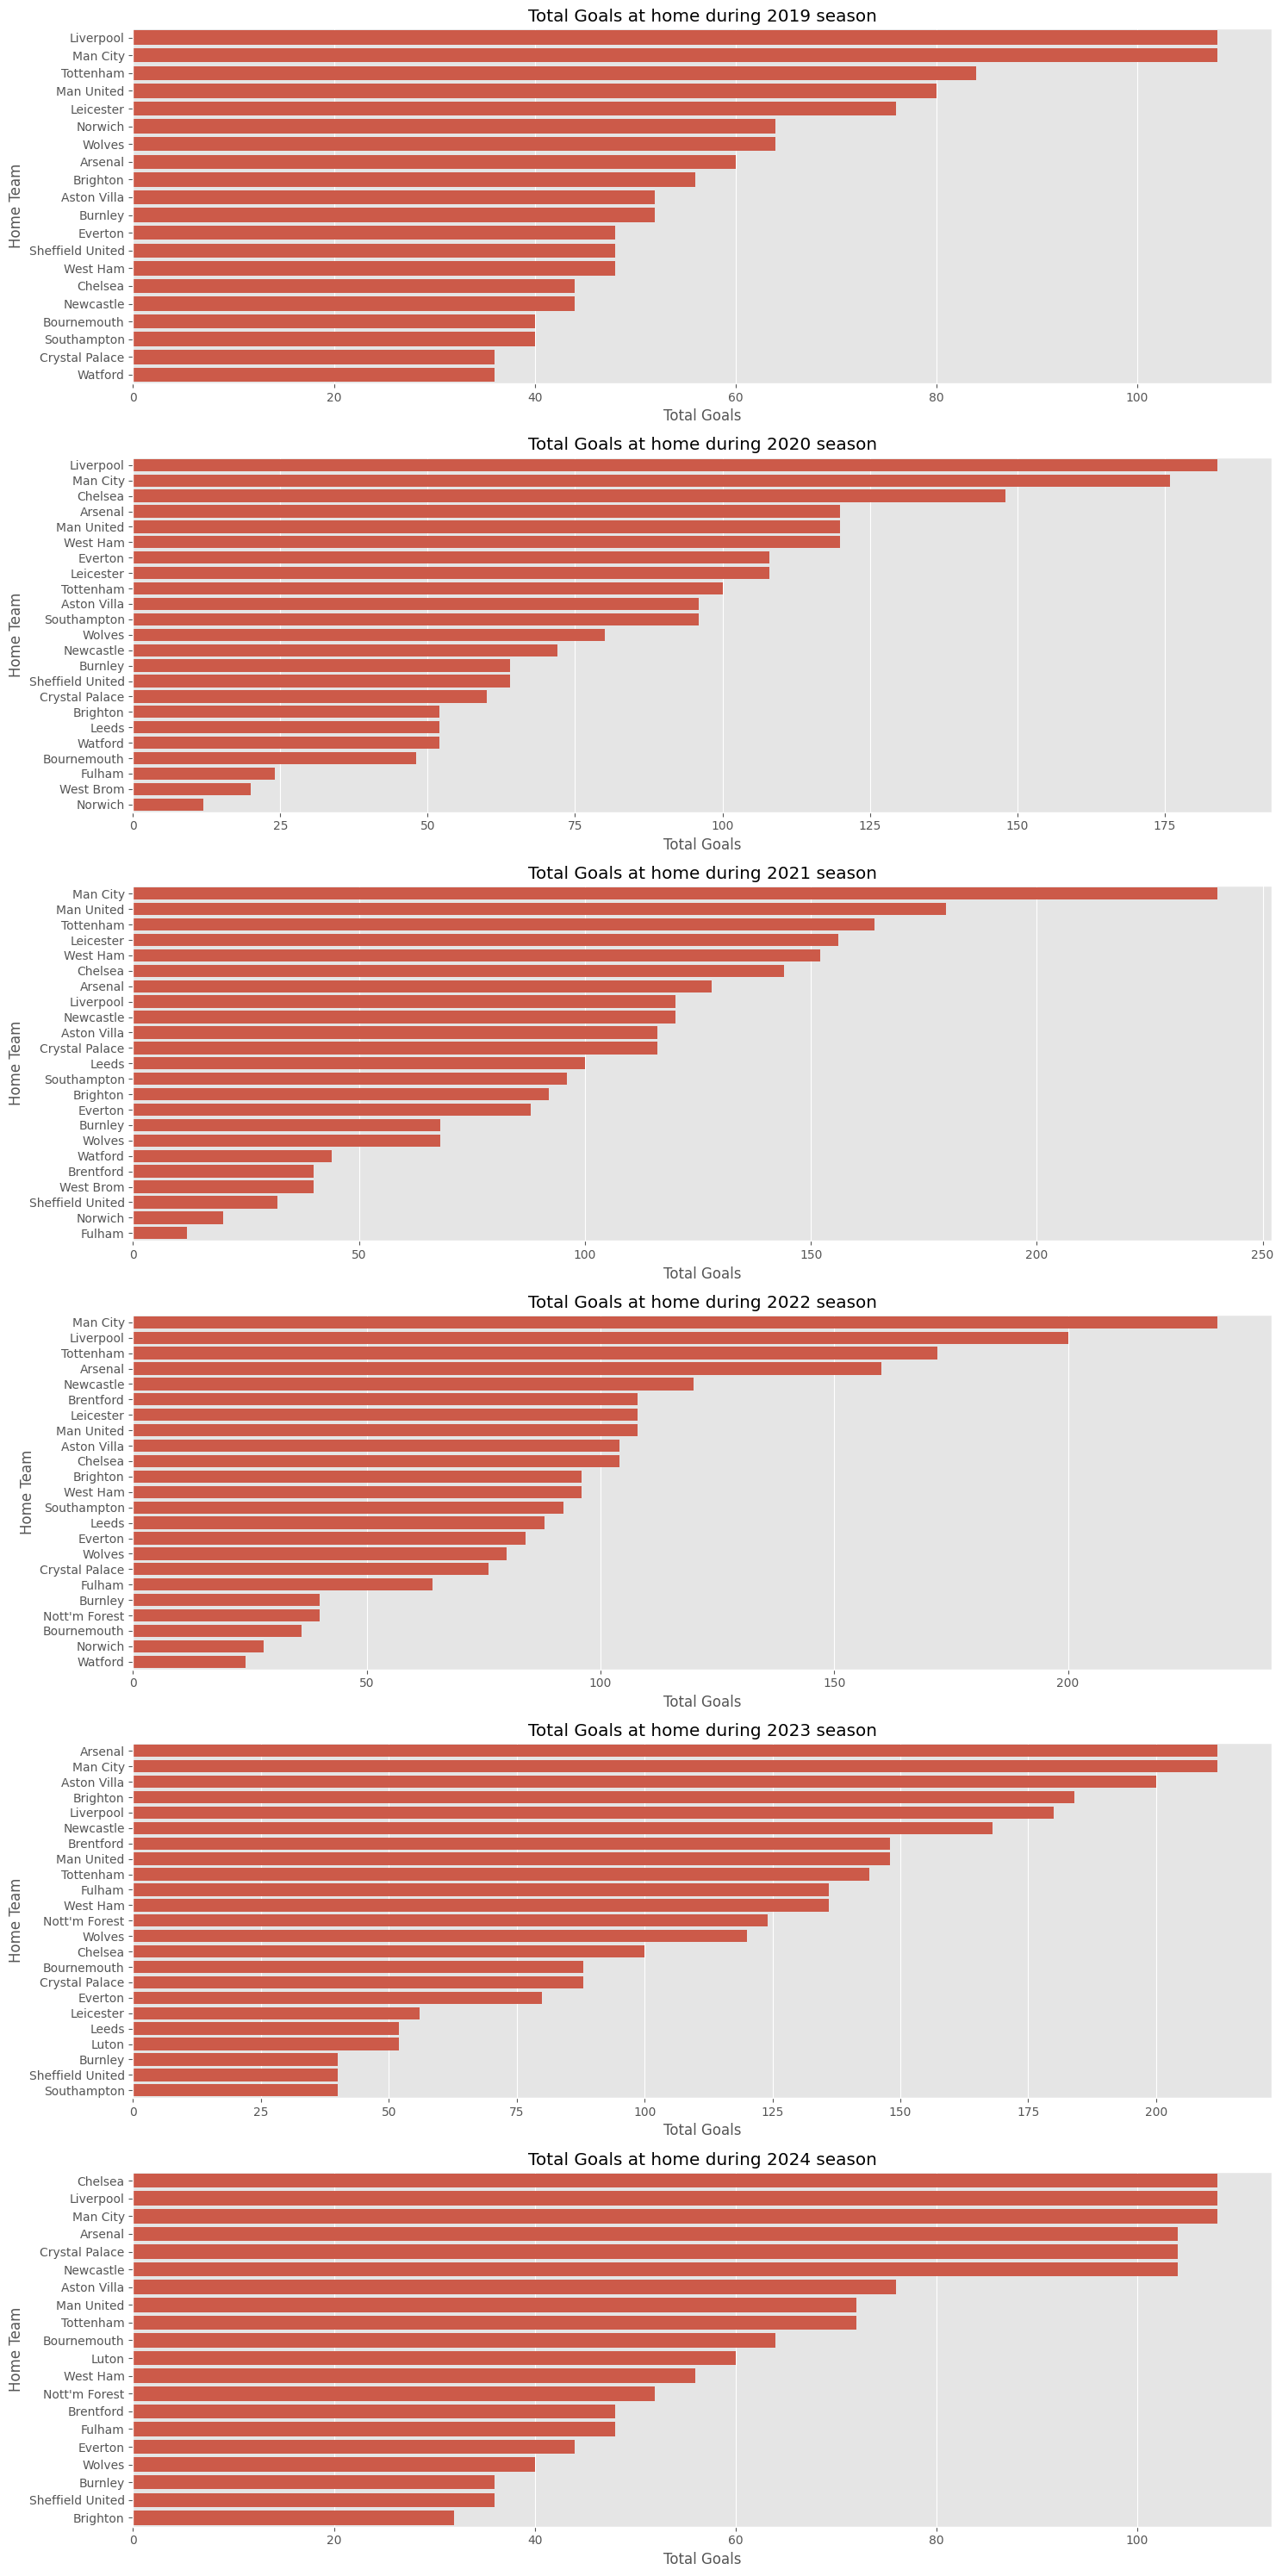

In [17]:
result_data = result_data.rename(columns={'hometeam': 'home_team', 'fthg': 'home_goals'})
result_csv_goals_hometeam = result_data.groupby(['year', 'home_team'])['home_goals'].sum().reset_index()
result_csv_goals_hometeam = result_csv_goals_hometeam.sort_values(by=['year', 'home_goals'], ascending=[True, False])

fig2, ax3 = plt.subplots(len(years), 1)
fig2.set_size_inches(15, len(years) * 5)

for year, i in zip(years, range(len(years))):
    sns.barplot(data=result_csv_goals_hometeam[result_csv_goals_hometeam['year'] == year], x='home_goals', y='home_team', ax=ax3[i])
    ax3[i].set_title(f'Total Goals at home during {year} season')
    ax3[i].set_xlabel("Total Goals")
    ax3[i].set_ylabel("Home Team")

plt.tight_layout()
plt.show()

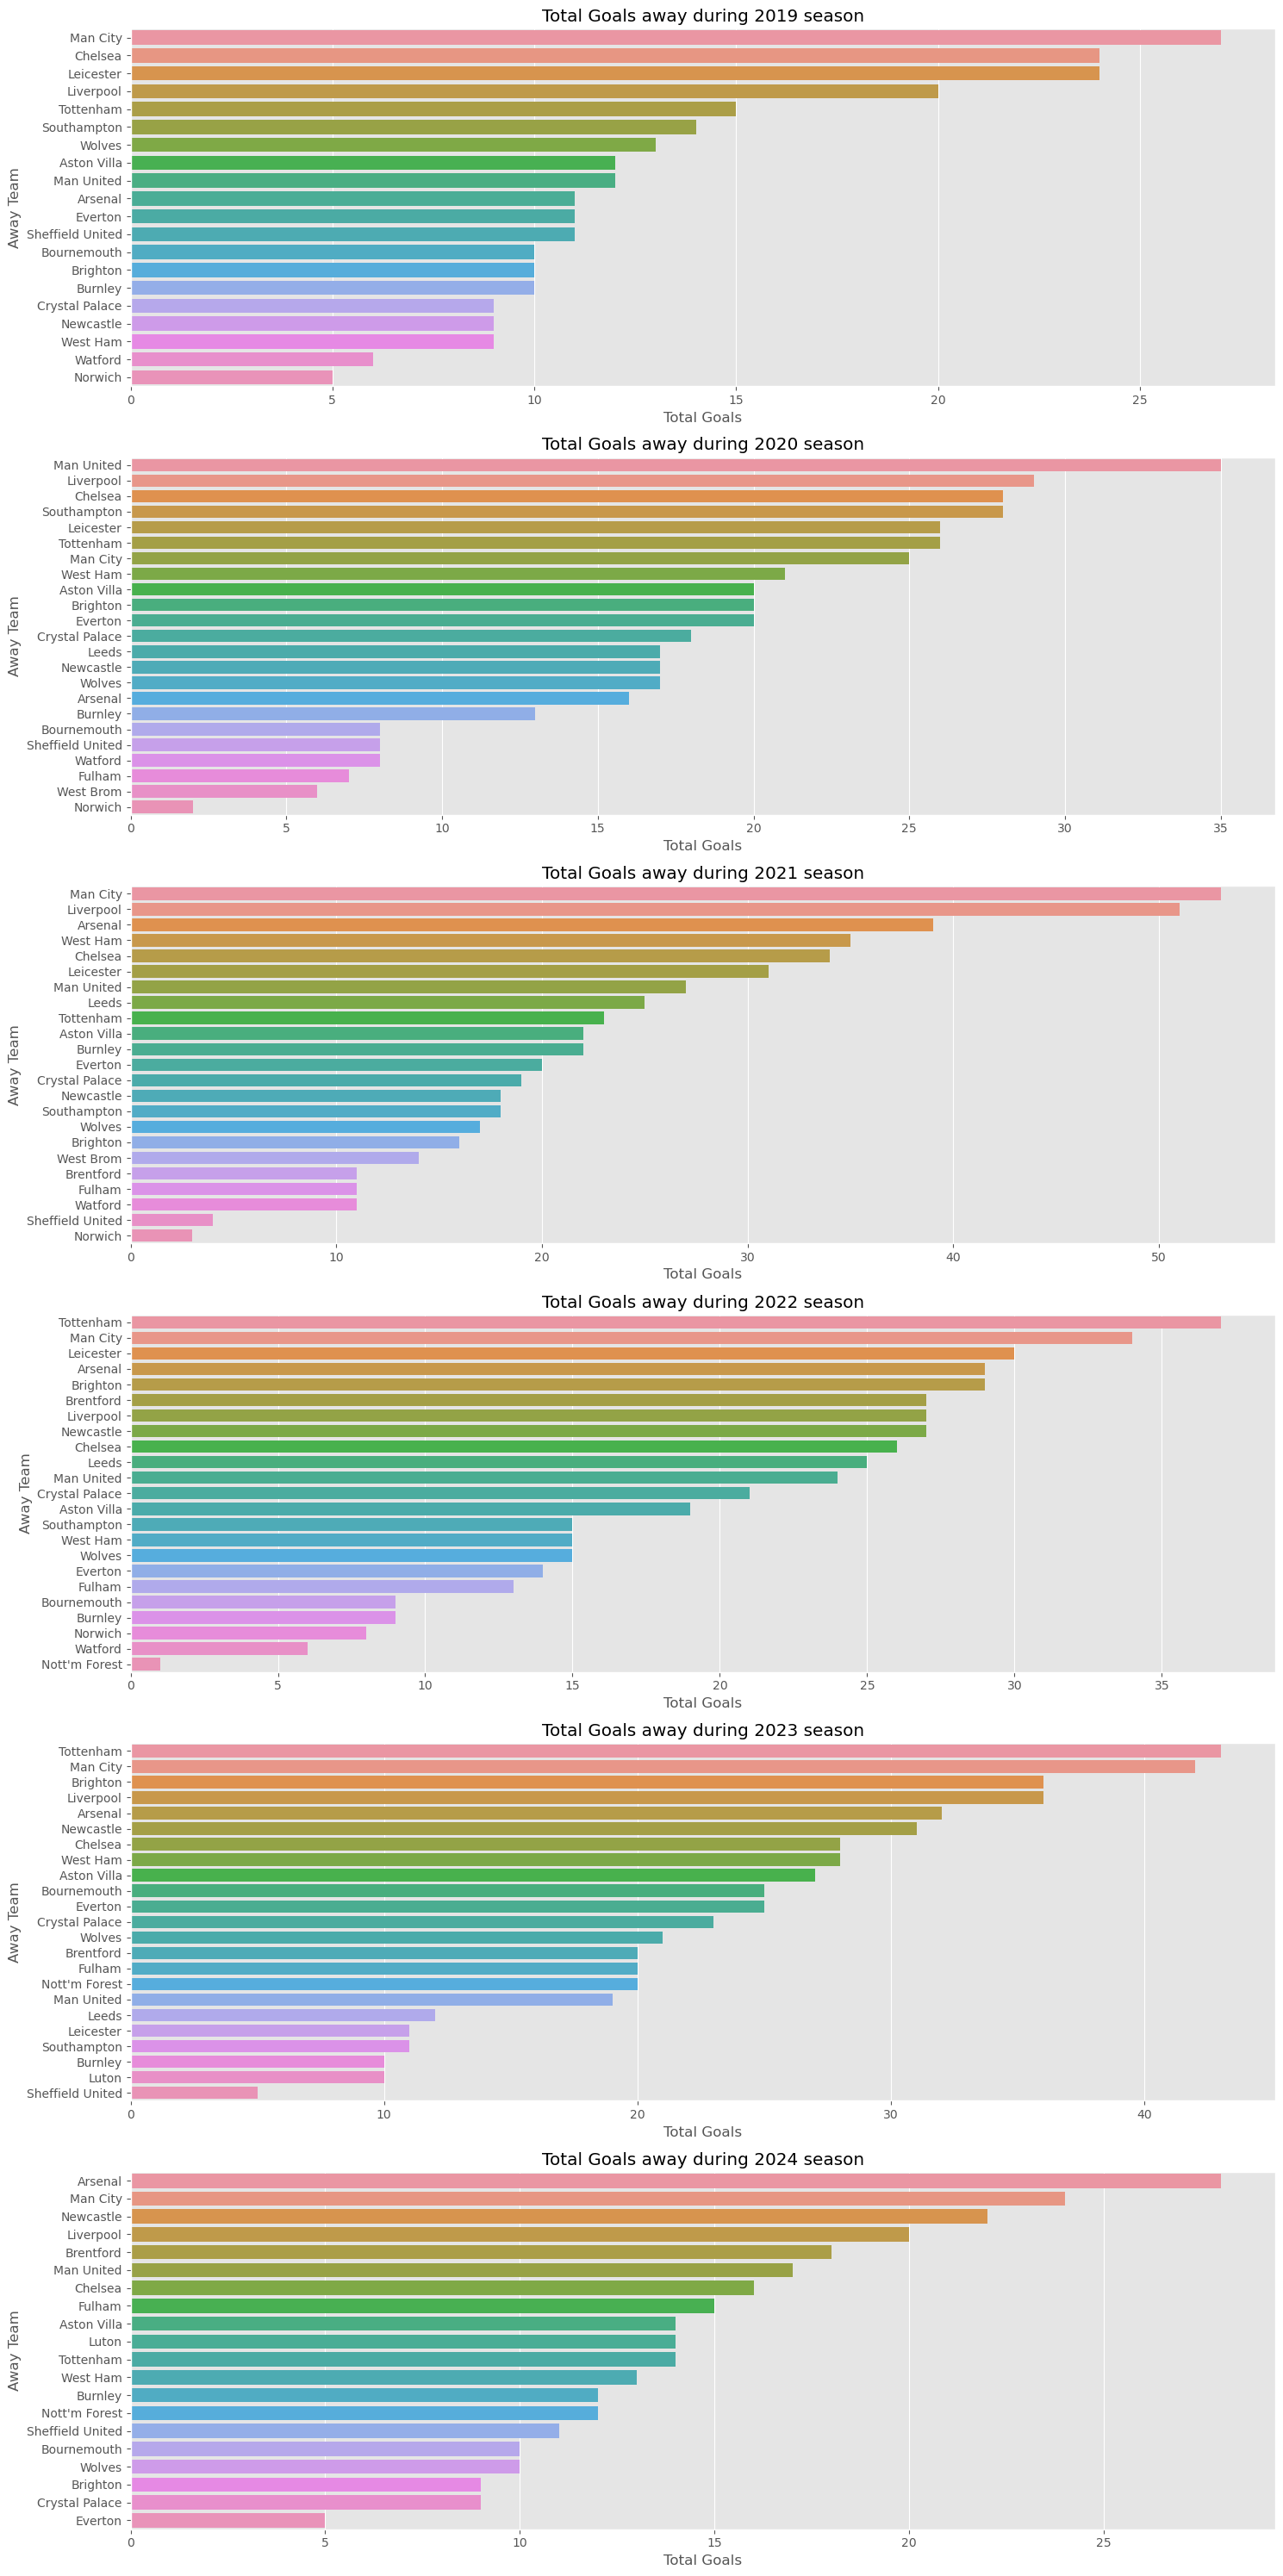

In [63]:
result_data = result_data.rename(columns={'awayteam': 'away_team', 'ftag': 'away_goals'})
result_csv_goals_awayteam = result_data.groupby(['year', 'away_team'])['away_goals'].sum().reset_index()
result_csv_goals_awayteam = result_csv_goals_awayteam.sort_values(by=['year', 'away_goals'], ascending=[True, False])

fig2, ax3 = plt.subplots(len(years), 1)
fig2.set_size_inches(15, len(years) * 5)

for year, i in zip(years, range(len(years))):
    sns.barplot(data=result_csv_goals_awayteam[result_csv_goals_awayteam['year'] == year], x='away_goals', y='away_team', ax=ax3[i])
    ax3[i].set_title(f'Total Goals away during {year} season')
    ax3[i].set_xlabel("Total Goals")
    ax3[i].set_ylabel("Away Team")

plt.tight_layout()
plt.show()

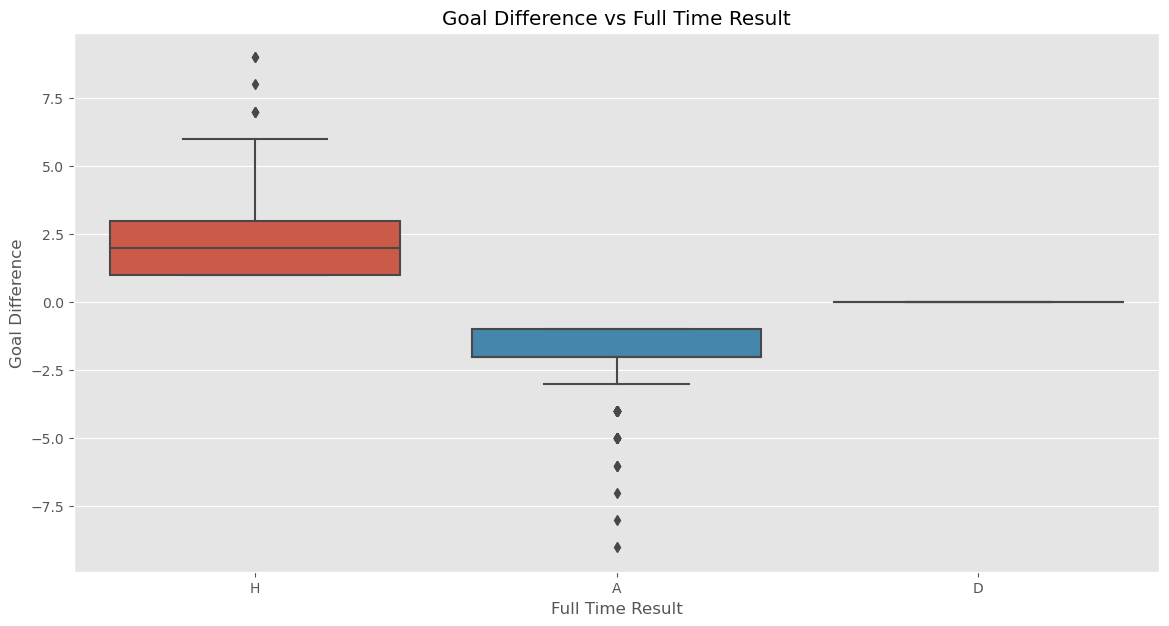

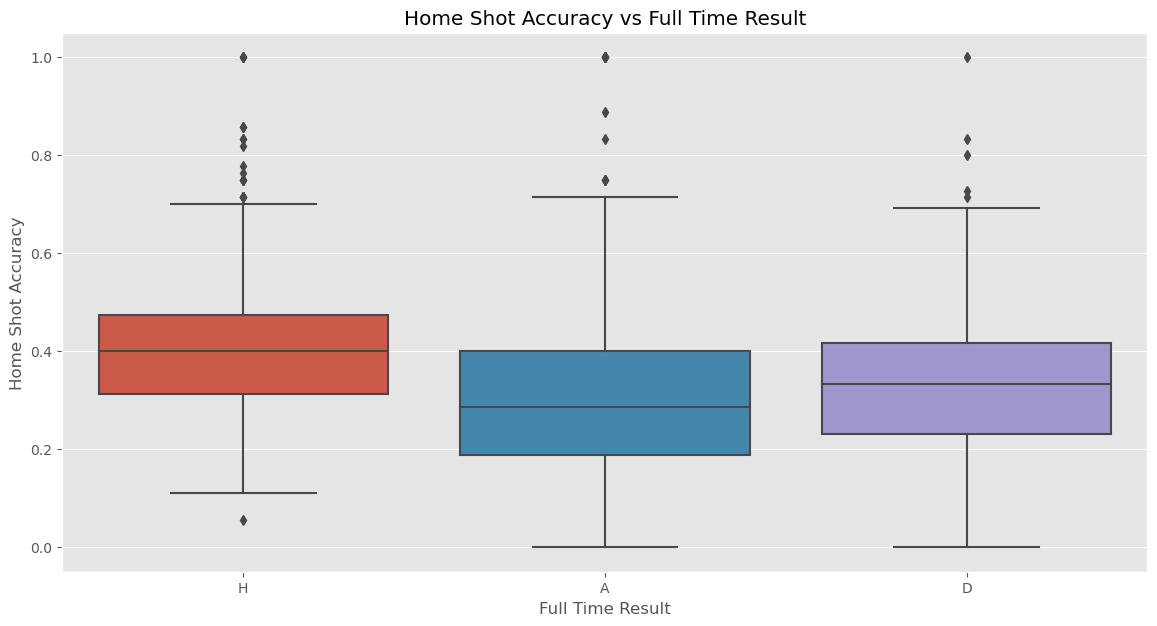

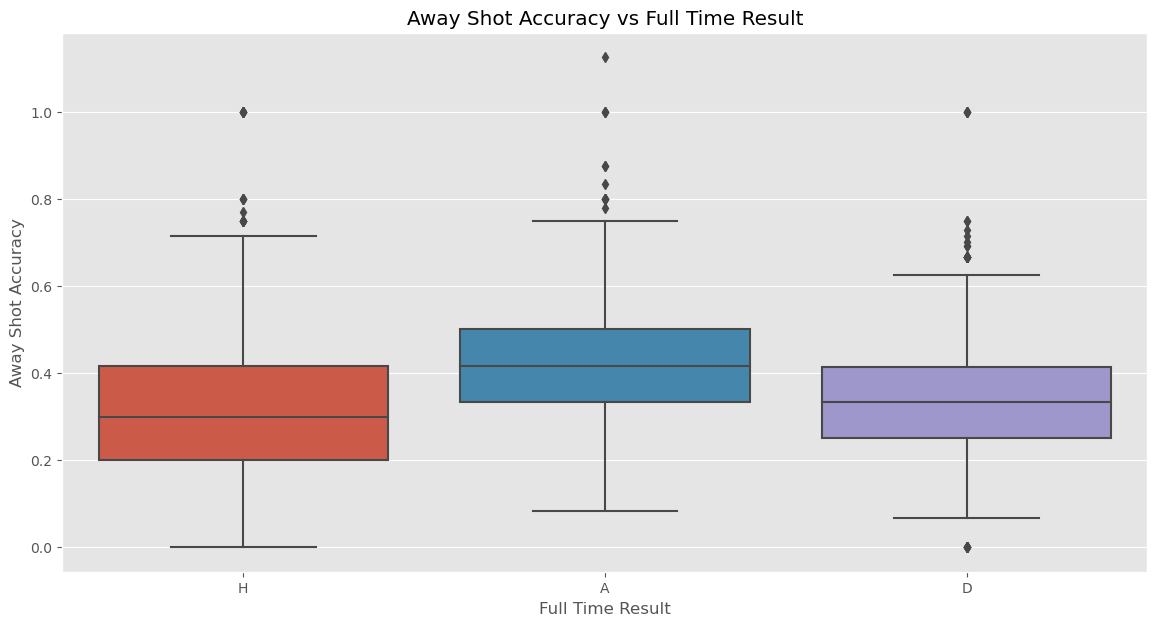

In [64]:
# Goal Difference
total_df['Goal_Diff'] = total_df['FTHG'] - total_df['FTAG']

# Shot Accuracy
total_df['Home_Shot_Accuracy'] = total_df['HST'] / total_df['HS']
total_df['Away_Shot_Accuracy'] = total_df['AST'] / total_df['AS']

# Goal Difference vs FTR
plt.figure(figsize=(14, 7))
sns.boxplot(x='FTR', y='Goal_Diff', data=total_df)
plt.title('Goal Difference vs Full Time Result')
plt.xlabel('Full Time Result')
plt.ylabel('Goal Difference')
plt.show()

# Shot Accuracy vs FTR
plt.figure(figsize=(14, 7))
sns.boxplot(x='FTR', y='Home_Shot_Accuracy', data=total_df)
plt.title('Home Shot Accuracy vs Full Time Result')
plt.xlabel('Full Time Result')
plt.ylabel('Home Shot Accuracy')
plt.show()

plt.figure(figsize=(14, 7))
sns.boxplot(x='FTR', y='Away_Shot_Accuracy', data=total_df)
plt.title('Away Shot Accuracy vs Full Time Result')
plt.xlabel('Full Time Result')
plt.ylabel('Away Shot Accuracy')
plt.show()


In [66]:
total_df.shape

(1900, 109)

In [35]:
!pip install xgboost lightgbm imbalanced-learn seaborn


  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/a2/48/d5da8591891327b0faf08179d420fba3893c6134bdd449497c5329e4cb01/xgboost-2.1.0-py3-none-win_amd64.whl.metadata
  Obtaining dependency information for lightgbm from https://files.pythonhosted.org/packages/ca/b4/57f3f253721e0a16ea28c49acca92c5b1198eb94fbbb8328d6dabc61d2e0/lightgbm-4.4.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 435.7 kB/s eta 0:04:47
   ---------------------------------------- 0.0/124.9 MB 435.7 kB/s eta 0:04:47
   ---------------------------------------- 0.0/124.9 MB 178.6 kB/s eta 0:11:40
   ---------------------------------------- 0.1/124.9 MB 374.1 kB/s eta 0:05:34
   ---------------------------------------- 0.1/124.9 MB 481.4 kB/s eta 0:04:20
   ---------------------------------------- 0.

In [38]:
!pip install --upgrade scikit-learn numpy


  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/ae/20/6d1a0a61d468b37a142fd90bb93c73bc1c2205db4a69ac630ed218c31612/scikit_learn-1.5.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for numpy from https://files.pythonhosted.org/packages/9b/0f/022ca4783b6e6239a53b988a4d315d67f9ae7126227fb2255054a558bd72/numpy-2.0.0-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/60.9 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.9 kB ? eta -:--:--
     ------------------- ------------------ 30.7/60.9 kB 660.6 kB/s eta 0:00:01
     ------------------- ------------------ 30.7/60.9 kB 660.6 kB/s eta 0:00:01
     -------------------------------------- 60.9/60.9 kB 405.3 kB/s eta 0:00:00
  Obtaining dependency information for threadpoolctl>=3.1.0 from https://files.pythonhosted.org/packages/4b/2c/ffbf7a134b9ab11a67b0cf0726453cedd9c5043a4fe7a35d1cefa9a1bcfb/threadpoolctl-3.5.0-p

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\USER\\anaconda3\\Lib\\site-packages\\~umpy\\core\\_multiarray_tests.cp311-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [40]:
!pip install --user --upgrade scikit-learn numpy

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/ae/20/6d1a0a61d468b37a142fd90bb93c73bc1c2205db4a69ac630ed218c31612/scikit_learn-1.5.0-cp311-cp311-win_amd64.whl.metadata
  Using cached scikit_learn-1.5.0-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Obtaining dependency information for numpy from https://files.pythonhosted.org/packages/9b/0f/022ca4783b6e6239a53b988a4d315d67f9ae7126227fb2255054a558bd72/numpy-2.0.0-cp311-cp311-win_amd64.whl.metadata
  Using cached numpy-2.0.0-cp311-cp311-win_amd64.whl.metadata (60 kB)
Using cached scikit_learn-1.5.0-cp311-cp311-win_amd64.whl (11.0 MB)


In [67]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1900 entries, 0 to 1899
Columns: 109 entries, Div to Away_Shot_Accuracy
dtypes: float64(84), int64(17), object(8)
memory usage: 1.6+ MB


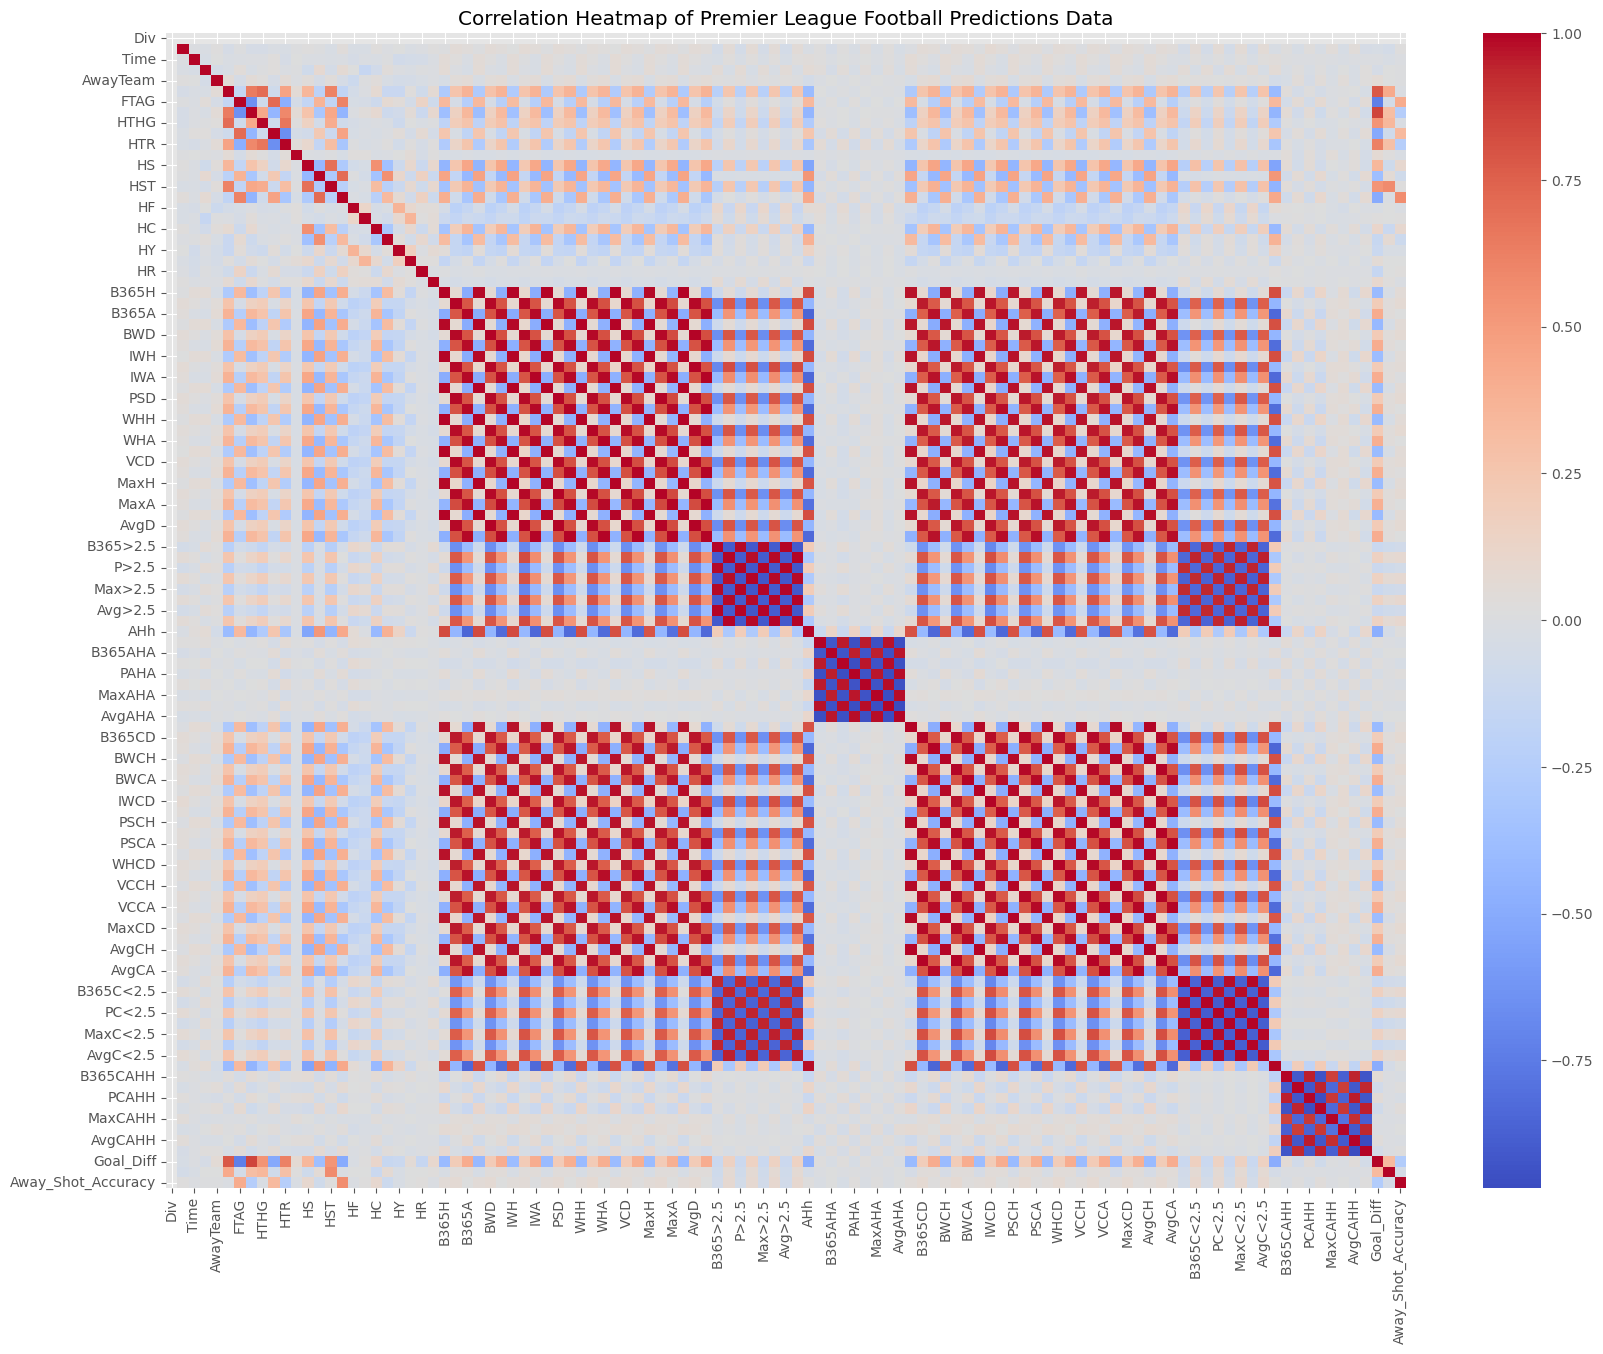

In [68]:
# Apply label encoding on object features
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in total_df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    total_df[column] = label_encoders[column].fit_transform(total_df[column])

# Plot the heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(total_df.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap of Premier League Football Predictions Data')
plt.show()

Selected Features:  ['AvgAHA', 'HF', 'B365AHH', 'MaxAHA', 'B365AHA', 'AvgAHH', 'Time', 'MaxAHH', 'PAHH', 'MaxCAHH', 'PAHA', 'HomeTeam', 'MaxCAHA', 'AF', 'Date', 'AvgCAHH', 'AY', 'AwayTeam', 'PCAHH', 'B365CAHH', 'Referee', 'AvgCAHA', 'HY', 'B365CAHA', 'PCAHA', 'HC', 'P>2.5', 'AR', 'AC', 'Avg>2.5', 'B365>2.5', 'Max>2.5', 'B365C>2.5', 'PC>2.5', 'AvgC>2.5', 'MaxC>2.5', 'HR', 'P<2.5', 'Avg<2.5', 'Max<2.5', 'PC<2.5', 'B365<2.5', 'AvgC<2.5', 'MaxC<2.5', 'IWCD', 'IWD', 'B365C<2.5', 'WHCD', 'B365CD', 'PSCD', 'MaxCD', 'WHD', 'VCD', 'B365D', 'BWCD', 'BWD', 'VCCD', 'AvgCD', 'MaxD', 'PSD', 'AvgD', 'Away_Shot_Accuracy', 'HS', 'AS', 'Home_Shot_Accuracy', 'IWA', 'IWCA', 'MaxA', 'MaxCA', 'WHA', 'PSA', 'VCA', 'BWA', 'PSCA', 'AvgA', 'BWCA', 'WHCA', 'VCCA', 'AvgCA', 'B365A', 'IWCH', 'IWH', 'B365CA', 'MaxCH', 'MaxH', 'VCCH', 'BWCH', 'WHCH', 'VCH', 'AvgCH', 'PSCH', 'WHH', 'B365CH', 'AvgH', 'PSH', 'B365H', 'BWH', 'HTHG', 'AHh', 'HTAG', 'HST', 'AHCh', 'AST']


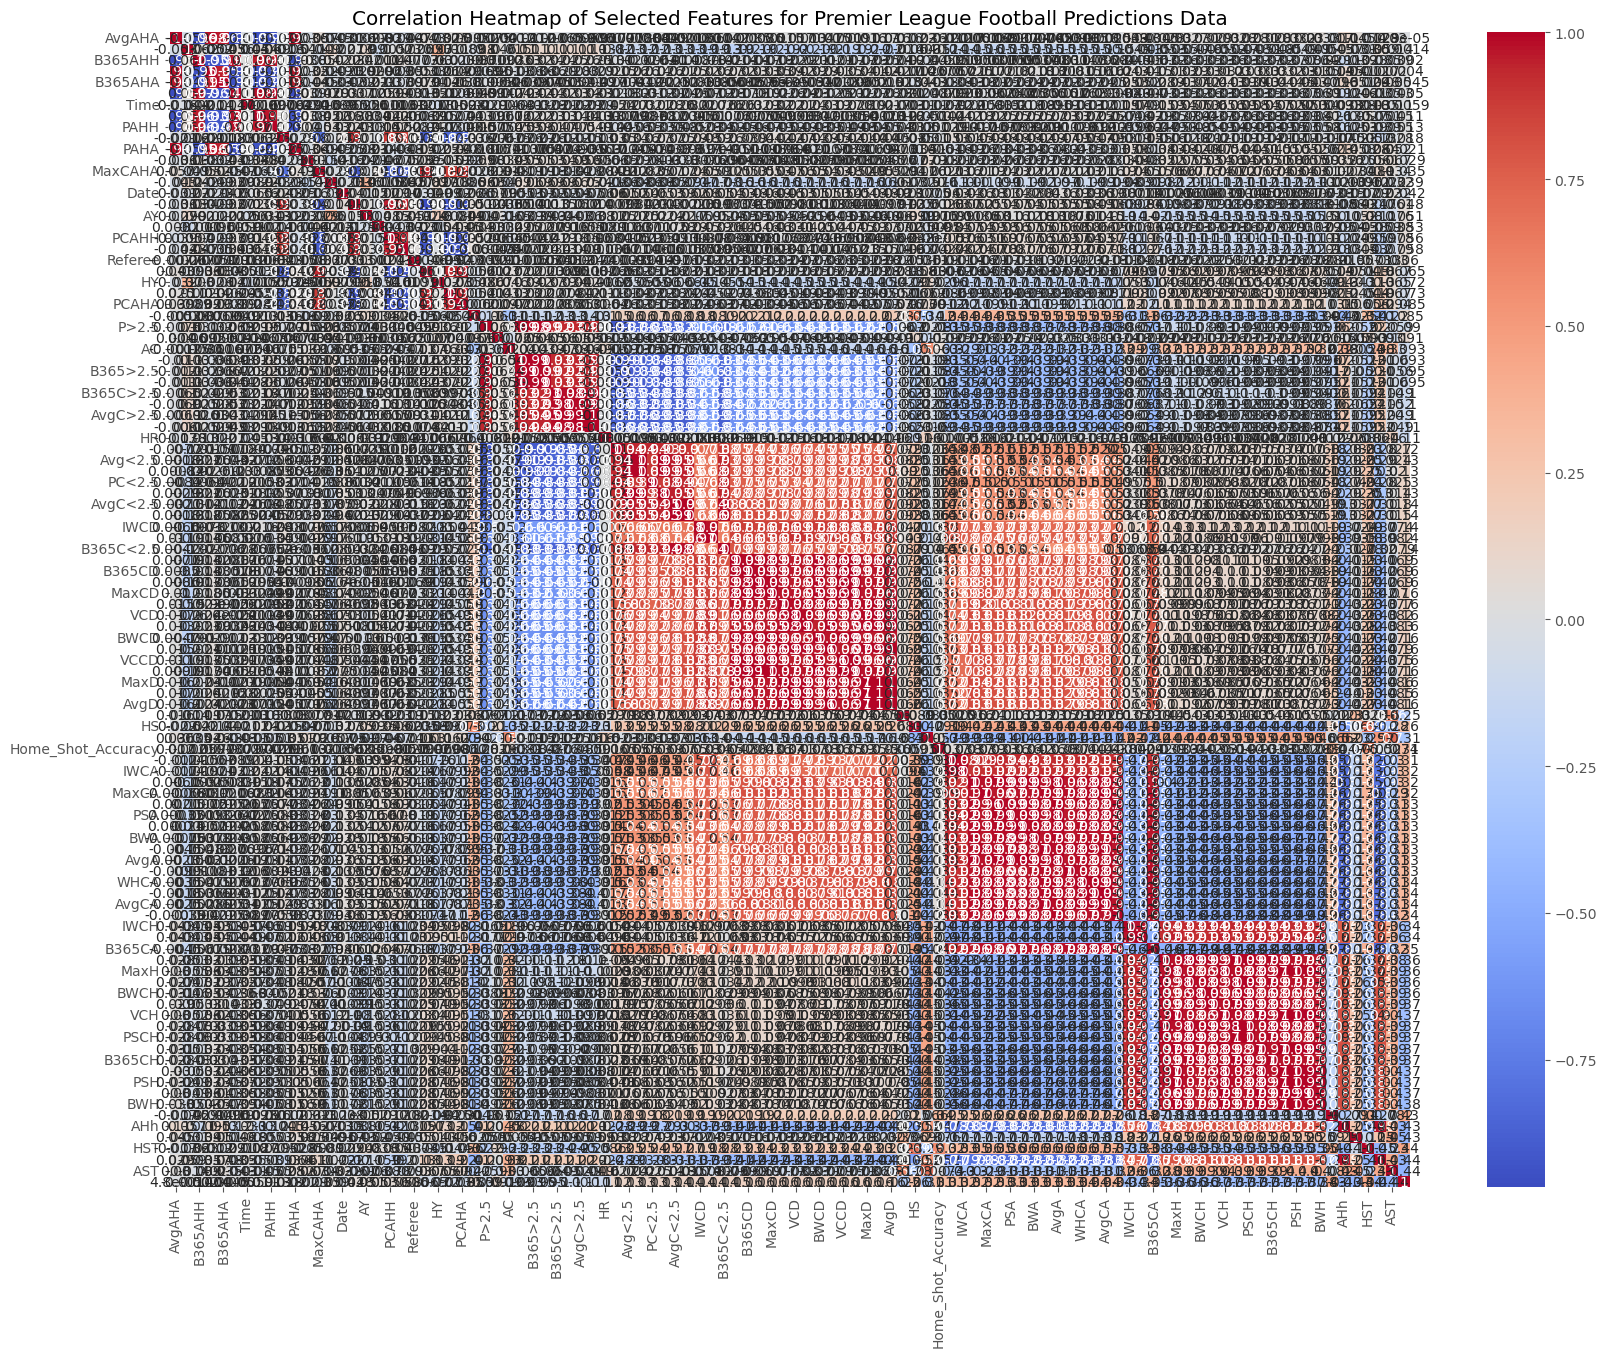

In [83]:
# Separate the target variable (FTR) and select features with less significant correlation to the target
correlation_matrix = total_df.corr()
target_correlation = correlation_matrix["FTR"].abs().sort_values()

# Select features with lower correlation to FTR (threshold can be adjusted as needed)

selected_features = target_correlation[target_correlation < 0.5].index.tolist()
# Drop FTR from the features list if present
if 'FTR' in selected_features:
    selected_features.remove('FTR')

# Separate the selected features into X and the target variable into y
X = total_df[selected_features]
y = total_df['FTR']

# Display the selected features
print("Selected Features: ", selected_features)

# Plot the heatmap for selected features
plt.figure(figsize=(20, 15))
sns.heatmap(total_df[selected_features + ['FTR']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Selected Features for Premier League Football Predictions Data')
plt.show()

In [78]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import xgboost as xgb
import lightgbm as lgb
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

## Baseline Models

In [13]:
total_df.head()

Div        Date   Time        HomeTeam          AwayTeam  FTHG  FTAG FTR  \
0  E0  09/08/2019  20:00       Liverpool           Norwich     4     1   H   
1  E0  10/08/2019  12:30        West Ham          Man City     0     5   A   
2  E0  10/08/2019  15:00     Bournemouth  Sheffield United     1     1   D   
3  E0  10/08/2019  15:00         Burnley       Southampton     3     0   H   
4  E0  10/08/2019  15:00  Crystal Palace           Everton     0     0   D   

   HTHG  HTAG HTR   Referee  HS  AS  HST  AST  HF  AF  HC  AC  HY  AY  HR  AR  \
0     4     0   H  M Oliver  15  12    7    5   9   9  11   2   0   2   0   0   
1     0     1   A    M Dean   5  14    3    9   6  13   1   1   2   2   0   0   
2     0     0   D  K Friend  13   8    3    3  10  19   3   4   2   1   0   0   
3     0     0   D   G Scott  10  11    4    3   6  12   2   7   0   0   0   0   
4     0     0   D    J Moss   6  10    2    3  16  14   6   2   2   1   0   1   

   B365H  B365D  B365A    BWH   BWD    BWA    IWH   IWD    IWA    PSH   PSD  \
0   1.14  10.00  19.00   1.14  8.25  18.50   1.15  8.00  18.00   1.15  9.59   
1  12.00   6.50   1.22  11.50  5.75   1.26  11.00  6.10   1.25  11.68  6.53   
2   1.95   3.60   3.60   1.95  3.60   3.90   1.97  3.55   3.80   2.04  3.57   
3   2.62   3.20   2.75   2.65  3.20   2.75   2.65  3.20   2.75   2.71  3.31   
4   3.00   3.25   2.37   3.20  3.20   2.35   3.10  3.20   2.40   3.21  3.37   

     PSA    WHH  WHD    WHA    VCH  VCD    VCA   MaxH   MaxD   MaxA   AvgH  \
0  18.05   1.12  8.5  21.00   1.14  9.5  23.00   1.16  10.00  23.00   1.14   
1   1.26  13.00  6.0   1.24  12.00  6.5   1.25  13.00   6.75   1.29  11.84   
2   3.90   2.00  3.5   3.80   2.00  3.6   4.00   2.06   3.65   4.00   2.01   
3   2.81   2.70  3.2   2.75   2.70  3.3   2.80   2.80   3.33   2.85   2.68   
4   2.39   3.10  3.3   2.35   3.20  3.3   2.45   3.21   3.40   2.52   3.13   

   AvgD   AvgA  B365>2.5  B365<2.5  P>2.5  P<2.5  Max>2.5  Max<2.5  Avg>2.5  \
0  8.75  19.83      1.40      3.00   1.40   3.11     1.45     3.11     1.41   
1  6.28   1.25      1.44      2.75   1.49   2.77     1.51     2.77     1.48   
2  3.53   3.83      1.90      1.90   1.96   1.96     2.00     1.99     1.90   
3  3.22   2.78      2.10      1.72   2.17   1.77     2.20     1.78     2.12   
4  3.27   2.40      2.20      1.66   2.23   1.74     2.25     1.74     2.18   

   Avg<2.5   AHh  B365AHH  B365AHA  PAHH  PAHA  MaxAHH  MaxAHA  AvgAHH  \
0     2.92 -2.25     1.96     1.94  1.97  1.95    1.97    2.00    1.94   
1     2.65  1.75     2.00     1.90  2.02  1.90    2.02    1.92    1.99   
2     1.93 -0.50     2.01     1.89  2.04  1.88    2.04    1.91    2.00   
3     1.73  0.00     1.92     1.98  1.93  2.00    1.94    2.00    1.91   
4     1.70  0.25     1.85     2.05  1.88  2.05    1.88    2.09    1.84   

   AvgAHA  B365CH  B365CD  B365CA   BWCH  BWCD   BWCA   IWCH  IWCD   IWCA  \
0    1.94    1.14    9.50   21.00   1.14   9.0  20.00   1.15  8.00  18.00   
1    1.89   12.00    7.00    1.25  11.00   6.0   1.26  11.00  6.10   1.25   
2    1.88    1.95    3.70    4.20   1.95   3.6   3.90   1.97  3.55   3.85   
3    1.98    2.70    3.25    2.90   2.65   3.1   2.85   2.60  3.20   2.85   
4    2.04    3.40    3.50    2.25   3.30   3.3   2.25   3.40  3.30   2.20   

    PSCH   PSCD   PSCA   WHCH  WHCD   WHCA   VCCH  VCCD   VCCA  MaxCH  MaxCD  \
0   1.14  10.43  19.63   1.11   9.5  21.00   1.14  9.50  23.00   1.16  10.50   
1  11.11   6.68   1.27  11.00   6.5   1.24  12.00  6.50   1.25  13.00   7.00   
2   1.98   3.67   4.06   1.95   3.6   3.90   2.00  3.60   4.00   2.03   3.70   
3   2.71   3.19   2.90   2.62   3.2   2.80   2.70  3.25   2.90   2.72   3.26   
4   3.37   3.45   2.27   3.30   3.3   2.25   3.40  3.30   2.25   3.55   3.50   

   MaxCA  AvgCH  AvgCD  AvgCA  B365C>2.5  B365C<2.5  PC>2.5  PC<2.5  MaxC>2.5  \
0  23.00   1.14   9.52  19.18        1.3       3.50    1.34    3.44      1.36   
1   1.29  11.14   6.46   1.26        1.4       3.00    1.43    3.03      1.5

In [71]:
# Data Preprocessing
def preprocess_data(df):
    # Fill missing values
    df = df.fillna(df.median())
    return df

In [14]:
# Label Encoding
def label_encode(df):
    le = LabelEncoder()
    for column in df.select_dtypes(include=['object']).columns:
        df[column] = le.fit_transform(df[column].astype(str))
    return df

In [15]:
# Feature Selection
def feature_selection(df):
    corr_matrix = df.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
    df = df.drop(columns=to_drop)
    return df

In [72]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [73]:
# Dimensionality Reduction using PCA
def apply_pca(X, n_components=0.95):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_scaled)
    return X_pca, pca

In [74]:
# Handle Class Imbalance
def handle_imbalance(X_train, y_train):
    sm = SMOTE(random_state=42)
    X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
    return X_train_res, y_train_res

In [75]:
# Evaluate Model
def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Train the model
    model.fit(X_train, y_train)
    
    # Evaluate on the training set
    train_accuracy = model.score(X_train, y_train)
    print(f'Train accuracy: {train_accuracy}')
    
    # Evaluate on the test set
    y_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    print(f'Test accuracy: {test_accuracy}')
    
    # Confusion Matrix and Classification Report
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    
    print('Confusion Matrix:')
    print(cm)
    print('Classification Report:')
    print(cr)
    
    return train_accuracy, test_accuracy, cm, cr


In [76]:
# Hyperparameter Tuning
def hyperparameter_tuning(model, param_grid, X_train, y_train):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    return best_model

In [58]:
!pip uninstall scikit-learn --yes
!pip uninstall imblearn --yes
!pip install scikit-learn==1.2.2
!pip install imblearn

Found existing installation: scikit-learn 1.5.0
Uninstalling scikit-learn-1.5.0:
  Successfully uninstalled scikit-learn-1.5.0
Found existing installation: imblearn 0.0
Uninstalling imblearn-0.0:
  Successfully uninstalled imblearn-0.0
  Obtaining dependency information for scikit-learn==1.2.2 from https://files.pythonhosted.org/packages/db/98/169b46a84b48f92df2b5e163fce75d471f4df933f8b3d925a61133210776/scikit_learn-1.2.2-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/8.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.3 MB 320.0 kB/s eta 0:00:26
   ---------------------------------------- 0.0/8.3 MB 435.7 kB/s eta 0:00:19
   ---------------------------------------- 0.0/8.3 MB 245.8 kB/s eta 0:00:34
   ---------------------------------------- 0.1/8.3 MB 416.7 kB/s eta 0:00:20
    --------------------------------------- 0.1/8.3 MB 504.4 kB/s eta 0:00:17
    --------------------------------------- 0.1/8.3 MB 423.5 kB/s eta 0:00:20
  

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\USER\\anaconda3\\Lib\\site-packages\\~klearn\\decomposition\\_cdnmf_fast.cp311-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



  Obtaining dependency information for imblearn from https://files.pythonhosted.org/packages/81/a7/4179e6ebfd654bd0eac0b9c06125b8b4c96a9d0a8ff9e9507eb2a26d2d7e/imblearn-0.0-py2.py3-none-any.whl.metadata
  Using cached imblearn-0.0-py2.py3-none-any.whl.metadata (355 bytes)
Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)


In [60]:
!pip install scikit-learn==1.2.2

In [19]:
from imblearn.over_sampling import SMOTE

In [21]:
total_df.isnull().sum()

Div          0
Date         0
Time         0
HomeTeam     0
AwayTeam     0
FTHG         0
FTAG         0
FTR          0
HTHG         0
HTAG         0
HTR          0
Referee      0
HS           0
AS           0
HST          0
AST          0
HF           0
AF           0
HC           0
AC           0
HY           0
AY           0
HR           0
AR           0
B365H        0
B365D        0
B365A        0
B365>2.5     5
B365<2.5     5
AHh          0
B365AHH      0
B365AHA      0
B365C>2.5    0
B365C<2.5    0
B365CAHH     5
B365CAHA     5
MaxCAHH      5
MaxCAHA      5
dtype: int64

In [79]:
# Dimensionality Reduction using PCA
def apply_pca(X, n_components=0.95):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_scaled)
    return X_pca, pca

In [80]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA

In [81]:
from sklearn.pipeline import Pipeline

In [84]:
#missing data 
total_df = preprocess_data(total_df)
# label encoding 
#total_df = label_encode(total_df)
# Feature Selection
#total_df = feature_selection(total_df)    

# Split Data
X = total_df[selected_features]
y = total_df['FTR']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
# Pipeline for standardization and PCA
pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=0.95))
    ])
    
# Fit and transform the training data
X_train_pca = pipeline.fit_transform(X_train)
    
# Transform the testing data
X_test_pca = pipeline.transform(X_test)
    
# Handle Class Imbalance
X_train_res, y_train_res = handle_imbalance(X_train_pca, y_train)
    
# Define Models
models = {
        'RandomForest': RandomForestClassifier(random_state=42),
        'DecisionTree': DecisionTreeClassifier(random_state=42),
        'SVM': SVC(random_state=42, probability=True),
        'XGBoost': xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss'),
        'LightGBM': lgb.LGBMClassifier(random_state=42)
    }
    
# Hyperparameter grids
param_grids = {
        'RandomForest': {'n_estimators': [100, 200], 'max_depth': [None, 10, 20]},
        'DecisionTree': {'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]},
        'SVM': {'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01]},
        'XGBoost': {'n_estimators': [100, 200], 'learning_rate': [0.1, 0.01], 'max_depth': [3, 6, 9]},
        'LightGBM': {'n_estimators': [100, 200], 'learning_rate': [0.1, 0.01], 'num_leaves': [31, 64]}
    }
    
# Evaluate each model
results = {}
for model_name, model in models.items():
        print(f'\nEvaluating {model_name}...')
        best_model = hyperparameter_tuning(model, param_grids[model_name], X_train_res, y_train_res)
        train_acc, test_acc, cm, cr = evaluate_model(best_model, X_train_res, y_train_res, X_test_pca, y_test)
        results[model_name] = {
            'train_accuracy': train_acc,
            'test_accuracy': test_acc,
            'confusion_matrix': cm,
            'classification_report': cr
        }
    
        
# Print results
for model_name, result in results.items():
    print(f'\nResults for {model_name}:')
    print(f"Train Accuracy: {result['train_accuracy']}")
    print(f"Test Accuracy: {result['test_accuracy']}")
    print('Confusion Matrix:')
    print(result['confusion_matrix'])
    print('Classification Report:')
    print(result['classification_report'])


Evaluating RandomForest...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Train accuracy: 1.0
Test accuracy: 0.6736842105263158
Confusion Matrix:
[[100  19  13]
 [ 29  24  31]
 [ 16  16 132]]
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.76      0.72       132
           1       0.41      0.29      0.34        84
           2       0.75      0.80      0.78       164

    accuracy                           0.67       380
   macro avg       0.62      0.62      0.61       380
weighted avg       0.65      0.67      0.66       380


Evaluating DecisionTree...
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Train accuracy: 0.9985163204747775
Test accuracy: 0.5657894736842105
Confusion Matrix:
[[ 78  27  27]
 [ 26  27  31]
 [ 23  31 110]]
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.59      0.60       132
           1       0.32      0.32    


Evaluating RandomForest...

Evaluating DecisionTree...

Evaluating SVM...

Evaluating XGBoost...

Evaluating LightGBM...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000609 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5610
[LightGBM] [Info] Number of data points in the train set: 1617, number of used features: 22
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000567 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5610
[LightGBM] [Info] Number of data points in the train set: 1617, number of used features: 22
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training

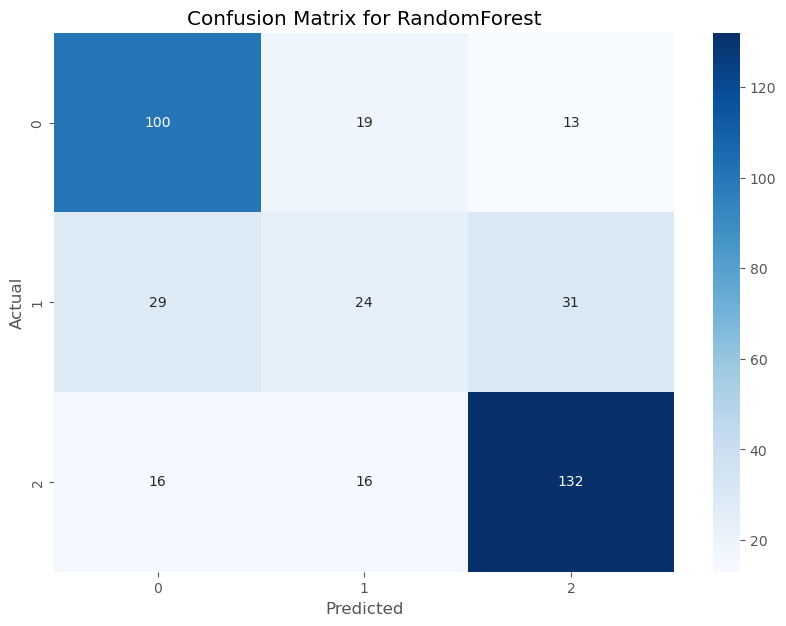


Results for DecisionTree:
Train Accuracy: 0.9985163204747775
Test Accuracy: 0.5657894736842105
Confusion Matrix:
[[ 78  27  27]
 [ 26  27  31]
 [ 23  31 110]]
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.59      0.60       132
           1       0.32      0.32      0.32        84
           2       0.65      0.67      0.66       164

    accuracy                           0.57       380
   macro avg       0.53      0.53      0.53       380
weighted avg       0.57      0.57      0.57       380



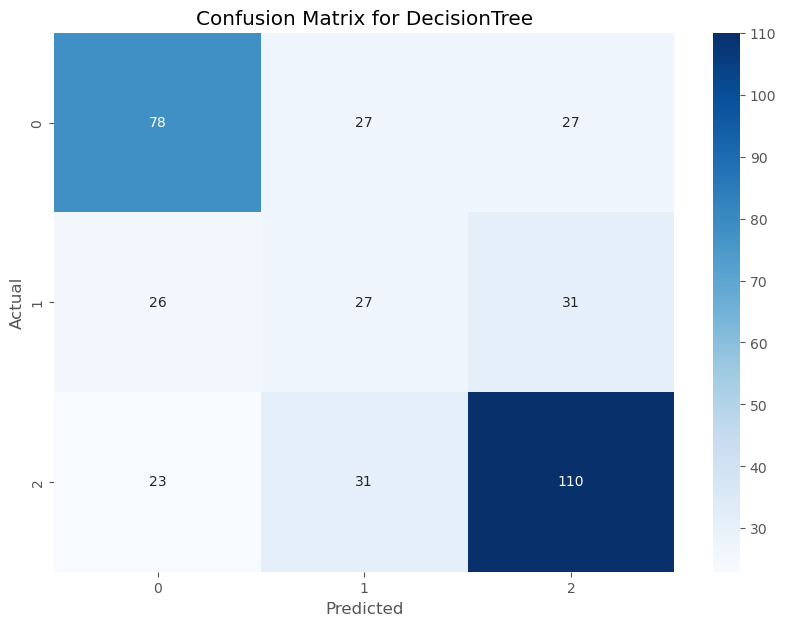


Results for SVM:
Train Accuracy: 1.0
Test Accuracy: 0.5973684210526315
Confusion Matrix:
[[ 77   7  48]
 [ 27   8  49]
 [ 17   5 142]]
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.58      0.61       132
           1       0.40      0.10      0.15        84
           2       0.59      0.87      0.70       164

    accuracy                           0.60       380
   macro avg       0.54      0.51      0.49       380
weighted avg       0.57      0.60      0.55       380



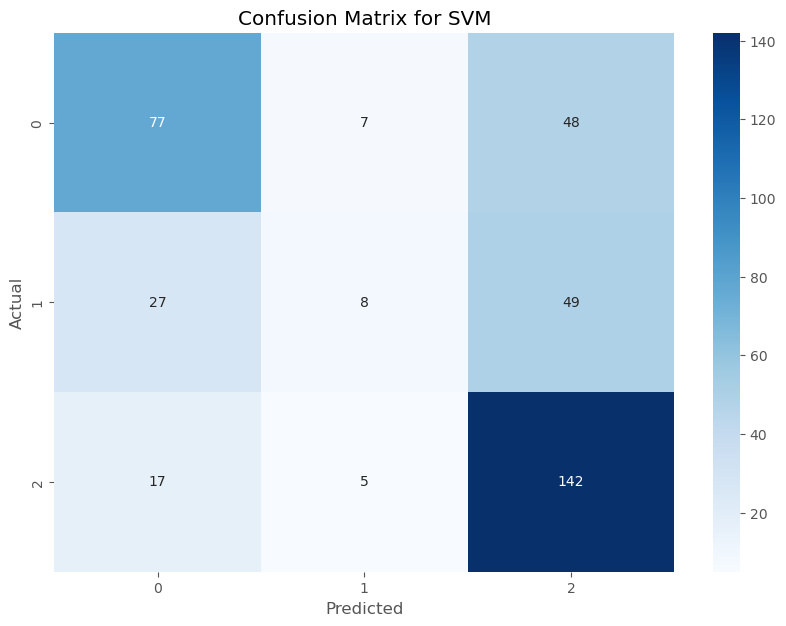


Results for XGBoost:
Train Accuracy: 1.0
Test Accuracy: 0.6447368421052632
Confusion Matrix:
[[ 94  20  18]
 [ 29  22  33]
 [ 13  22 129]]
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.71      0.70       132
           1       0.34      0.26      0.30        84
           2       0.72      0.79      0.75       164

    accuracy                           0.64       380
   macro avg       0.58      0.59      0.58       380
weighted avg       0.63      0.64      0.63       380



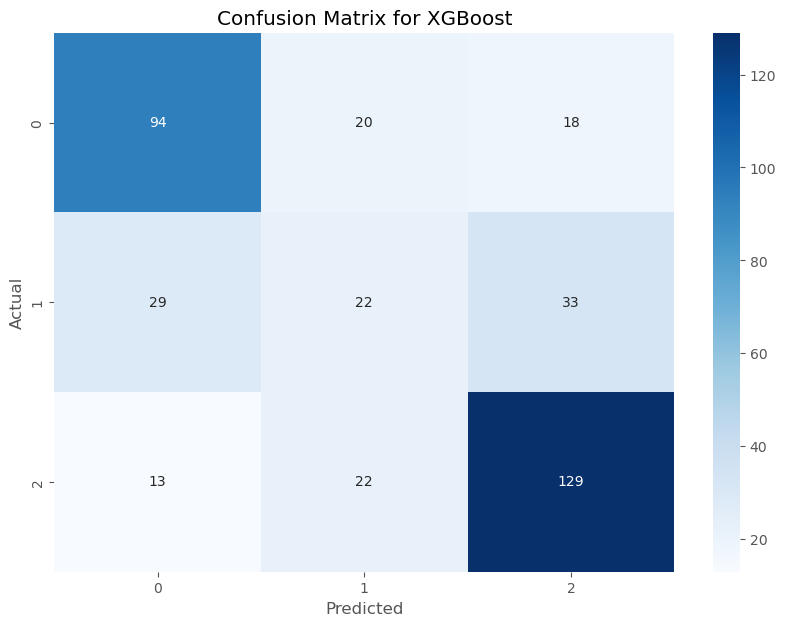


Results for LightGBM:
Train Accuracy: 1.0
Test Accuracy: 0.6710526315789473
Confusion Matrix:
[[ 99  17  16]
 [ 27  23  34]
 [ 14  17 133]]
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.75      0.73       132
           1       0.40      0.27      0.33        84
           2       0.73      0.81      0.77       164

    accuracy                           0.67       380
   macro avg       0.61      0.61      0.61       380
weighted avg       0.65      0.67      0.66       380



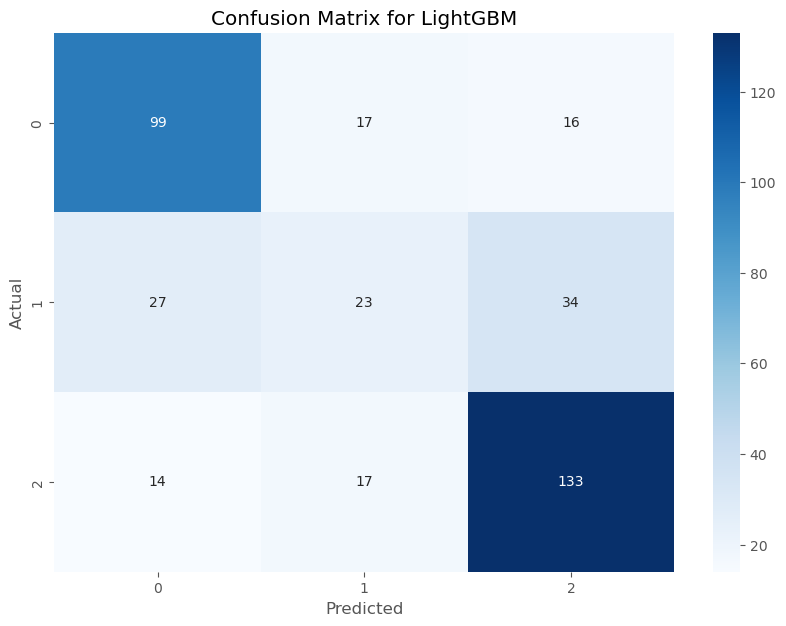

Model  Train Accuracy  Test Accuracy
0  LightGBM             1.0       0.671053

In [90]:
# Define models
models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'SVM': SVC(random_state=42, probability=True),
    'XGBoost': xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss'),
    'LightGBM': lgb.LGBMClassifier(random_state=42)
}

# Hyperparameter grids
param_grids = {
    'RandomForest': {'n_estimators': [100, 200], 'max_depth': [None, 10, 20]},
    'DecisionTree': {'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]},
    'SVM': {'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01]},
    'XGBoost': {'n_estimators': [100, 200], 'learning_rate': [0.1, 0.01], 'max_depth': [3, 6, 9]},
    'LightGBM': {'n_estimators': [100, 200], 'learning_rate': [0.1, 0.01], 'num_leaves': [31, 64]}
}

# Function to perform hyperparameter tuning
def hyperparameter_tuning(model, param_grid, X_train, y_train):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_

# Function to evaluate the model
def evaluate_model(model, X_train, y_train, X_test, y_test):
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)
    train_acc = accuracy_score(y_train, train_predictions)
    test_acc = accuracy_score(y_test, test_predictions)
    cm = confusion_matrix(y_test, test_predictions)
    cr = classification_report(y_test, test_predictions)
    return train_acc, test_acc, cm, cr

# Evaluate each model
results = {}
for model_name, model in models.items():
    print(f'\nEvaluating {model_name}...')
    best_model = hyperparameter_tuning(model, param_grids[model_name], X_train_res, y_train_res)
    train_acc, test_acc, cm, cr = evaluate_model(best_model, X_train_res, y_train_res, X_test_pca, y_test)
    results[model_name] = {
        'train_accuracy': train_acc,
        'test_accuracy': test_acc,
        'confusion_matrix': cm,
        'classification_report': cr
    }

# Print results and plot confusion matrices
for model_name, result in results.items():
    print(f'\nResults for {model_name}:')
    print(f"Train Accuracy: {result['train_accuracy']}")
    print(f"Test Accuracy: {result['test_accuracy']}")
    print('Confusion Matrix:')
    print(result['confusion_matrix'])
    print('Classification Report:')
    print(result['classification_report'])
    
    # Print results and plot confusion matrices
    accuracy_data = []
    # Append accuracy data
    accuracy_data.append({
        'Model': model_name,
        'Train Accuracy': result['train_accuracy'],
        'Test Accuracy': result['test_accuracy']
    })
    
    # Plot the confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(result['confusion_matrix'], annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Create a dataframe for the accuracy data
accuracy_df = pd.DataFrame(accuracy_data)
accuracy_df
    
   

In [86]:
# Print results and plot confusion matrices
accuracy_data = []

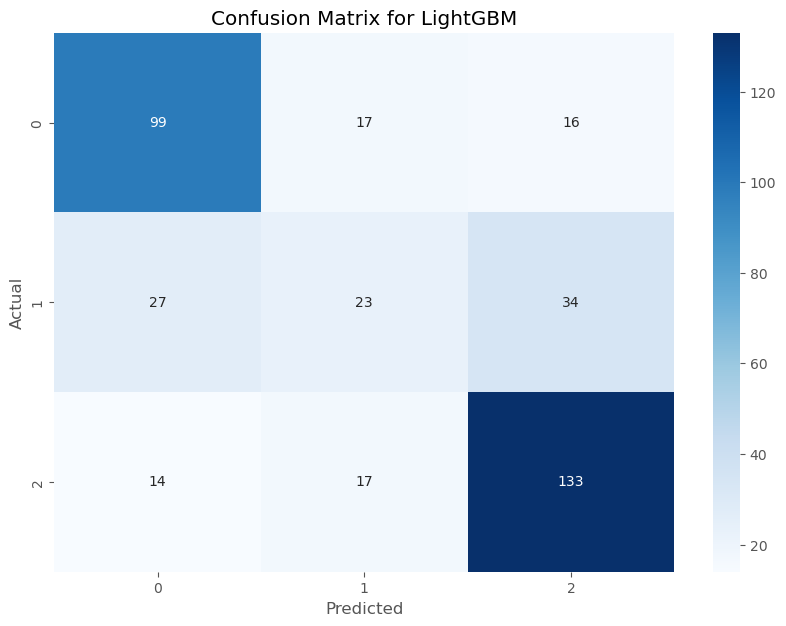